In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as lin

In [2]:
## Function for the dynamical system, competitive LV

# Note this was poorly written by me, I'll clean up redundancies later
def LV_dynamics(A_communityMatrix, fixed_point, x0_IC, epsilon_fpThresh, delta_timeStep, endtime): # no end time necessary
    numSteps = round(endtime/delta_timeStep)
    T_time = np.linspace(1,endtime,numSteps)
    x_point = np.matrix(np.zeros((len(x0_IC),numSteps)))
    
    A = A_communityMatrix
    x0 = np.matrix(x0_IC)
    fp = epsilon_fpThresh
    dt = delta_timeStep
    ET = endtime
    ones = np.matrix(np.ones((len(x0_IC),1)))
    p = np.matrix(fixed_point)
    

    growthRates = A*p
    r = growthRates
    x_point[:,0] = x0.T

    
    for n in range(1,numSteps):
        dx = np.multiply(dt*x_point[:,n-1],(r - A*x_point[:,n-1]))
        if np.sqrt((dx.T * dx)[0,0]) < fp: #Assuming we've hit the fixed point
        #if np.max(abs(dx)) < fp:
            break
        x_point[:,n] = x_point[:,n-1] + dx
        
    x_point = x_point[:,0:n-1]
    #T_time = T_time[:,1:n-1]
    return x_point

In [167]:
## Many normally distributed starting points and their dynamics
def MonteCarlo_LV(n_samples, A, p):
    n_spec = len(A)
    x_start = np.abs(np.random.randn(n_samples, n_spec))
    x_end = np.matrix(np.zeros((n_spec, n_samples)))
    for i in range(x_start.shape[0]):
        dyn_mat = LV_dynamics(A, p, x_start[i,:], .0001, .01, 10000)
        x_end[:,i] = dyn_mat[:,-1]
        plt.figure(i)
        for j in range(n_spec):
            plt.plot(dyn_mat[j,:].tolist()[0])
    plt.show()
    
    return x_end.T.round(2)

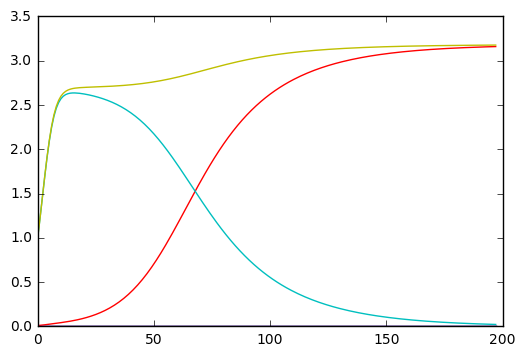

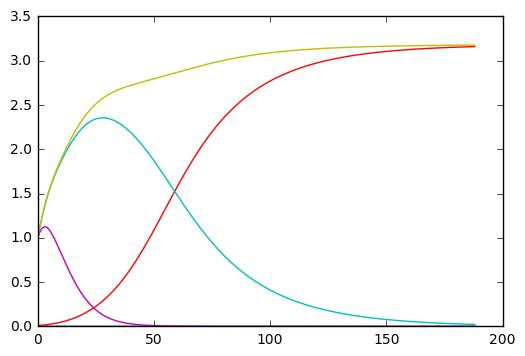

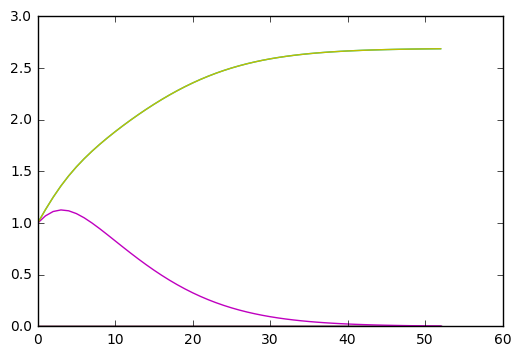

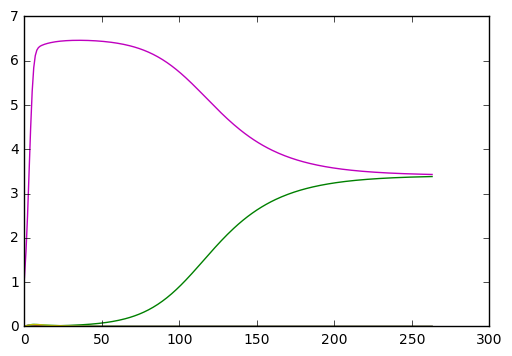

In [4]:
## Graph of single dynamic for some interesting cases
c = [1,.9,.3,.1,.3,.9]
A = lin.toeplitz(c)
## (101010) and (100100)
dyn_mat2 = LV_dynamics(A, np.matrix([1,1,1,1,1,1]).T, [0,0,.01,1,0,1], .001, .1, 10000)
plt.figure(1)
for j in range(6):
    plt.plot(dyn_mat2[j,:].tolist()[0])
##
dyn_mat2 = LV_dynamics(A, np.matrix([1,1,1,1,1,1]).T, [0,0,.01,1,1,1], .001, .1, 10000)
plt.figure(2)
for j in range(6):
    plt.plot(dyn_mat2[j,:].tolist()[0])
##
dyn_mat2 = LV_dynamics(A, np.matrix([1,1,1,1,1,1]).T, [0,0,0,1,1,1], .001, .1, 10000)
plt.figure(3)
for j in range(6):
    plt.plot(dyn_mat2[j,:].tolist()[0])
plt.show()

## Other Example
c = [1,1.1,1.2,.91,1.2,1.1]
A = lin.toeplitz(c)
dyn_mat = LV_dynamics(A, np.matrix([1,1,1,1,1,1]).T, [.01,.001,.01,.01,1.1,.01], .001, .1, 10000)
for j in range(6):
    plt.plot(dyn_mat[j,:].tolist()[0])
plt.show()


[ 3.5 -0.3  1.5  1.5 -0.1 -0.1]


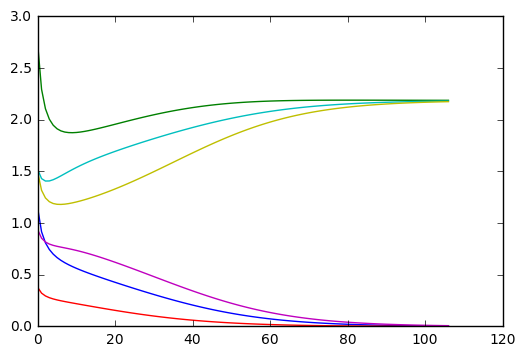

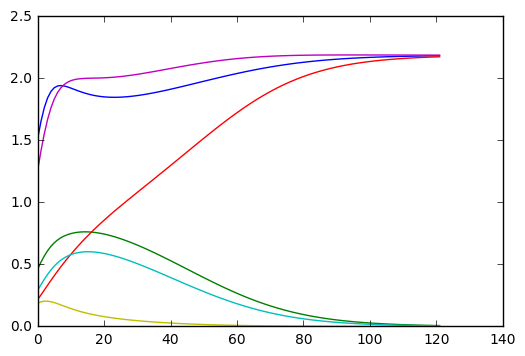

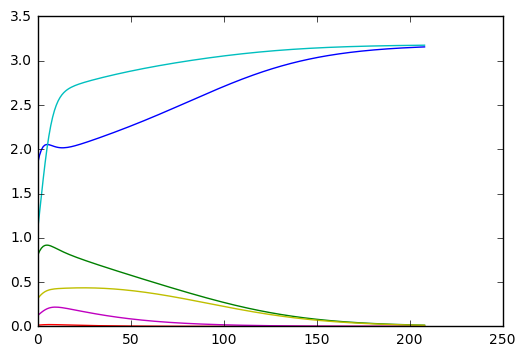

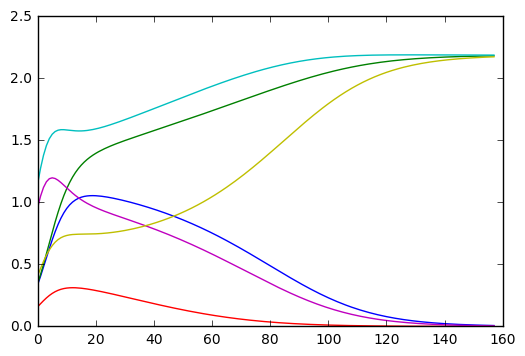

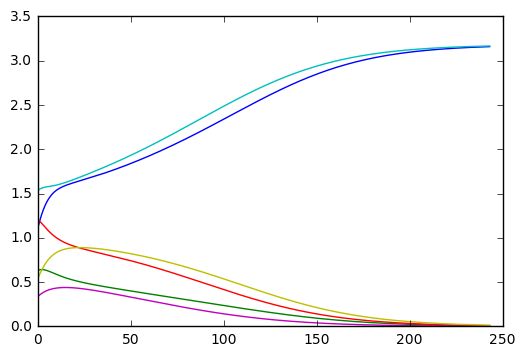

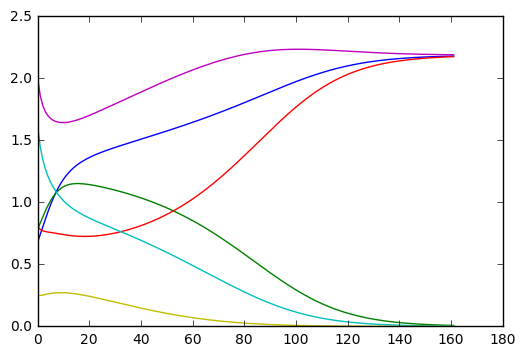

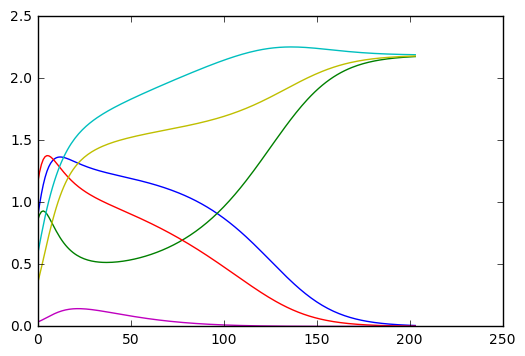

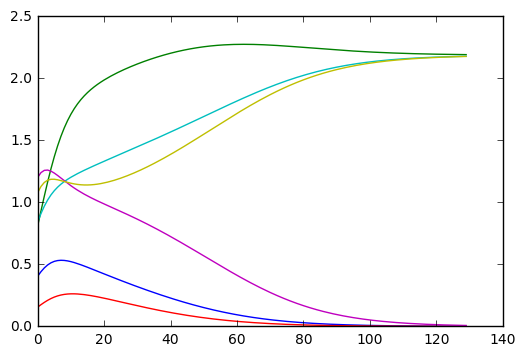

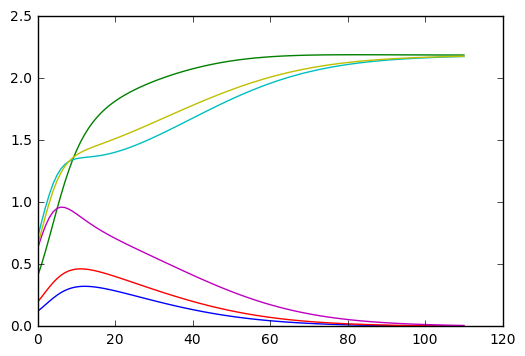

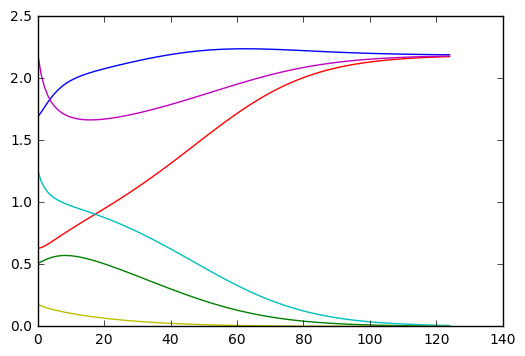

array([[ 0.  ,  2.19,  0.  ,  2.18,  0.01,  2.18],
       [ 2.18,  0.01,  2.17,  0.  ,  2.19,  0.  ],
       [ 3.16,  0.01,  0.  ,  3.18,  0.  ,  0.01],
       [ 0.01,  2.18,  0.  ,  2.19,  0.  ,  2.17],
       [ 3.16,  0.01,  0.01,  3.17,  0.  ,  0.01],
       [ 2.18,  0.01,  2.18,  0.  ,  2.19,  0.  ],
       [ 0.01,  2.18,  0.  ,  2.19,  0.  ,  2.18],
       [ 0.  ,  2.19,  0.  ,  2.18,  0.01,  2.18],
       [ 0.  ,  2.19,  0.  ,  2.18,  0.01,  2.18],
       [ 2.19,  0.  ,  2.18,  0.01,  2.18,  0.  ]])

In [5]:
## Not convex
c = [1,.9,.3,.1,.3,.9]
A = lin.toeplitz(c)
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A,np.matrix([1,1,1,1,1,1]).T)

[ 3.2    1.4    1.2    0.624 -0.224 -0.224  0.624  1.4  ]


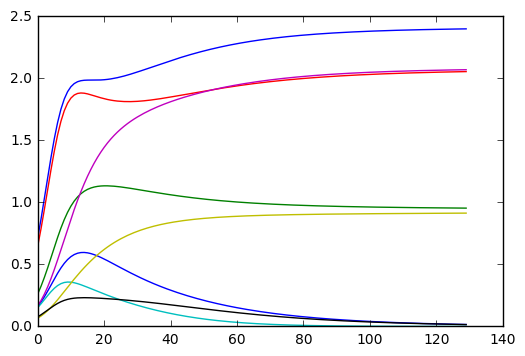

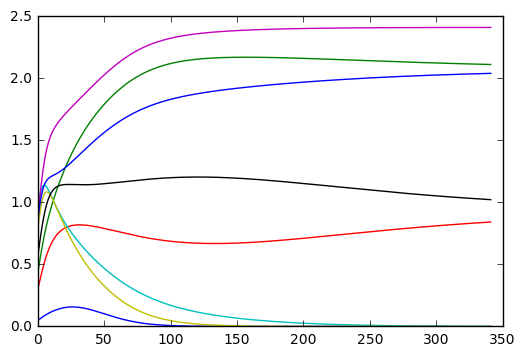

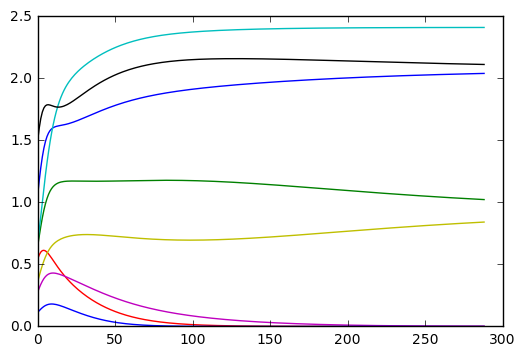

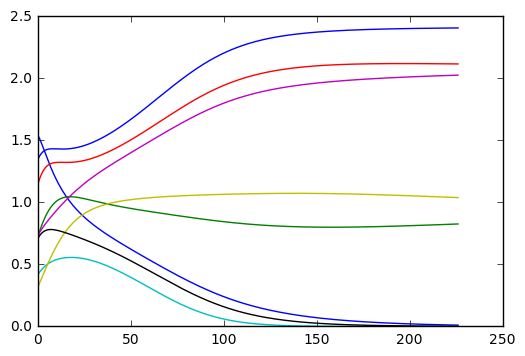

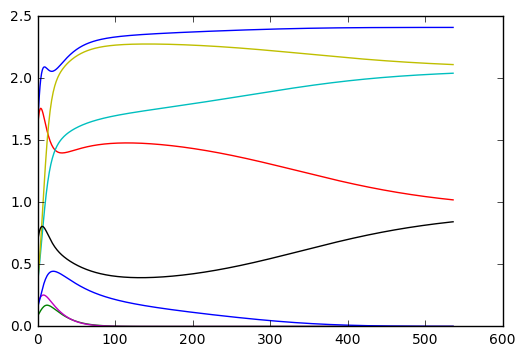

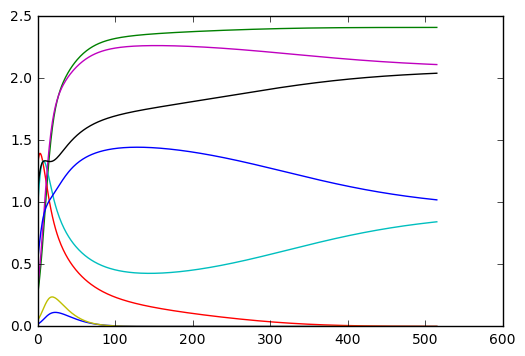

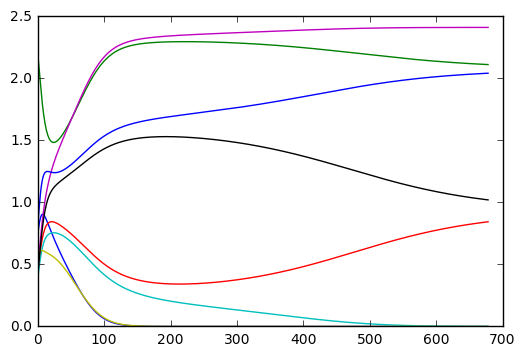

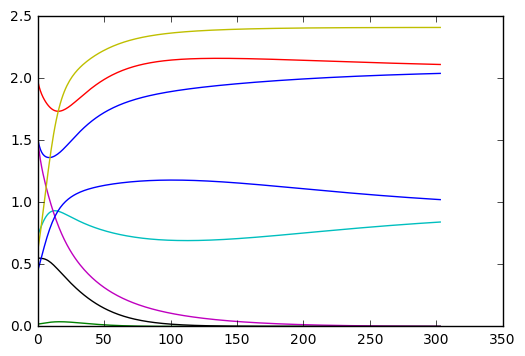

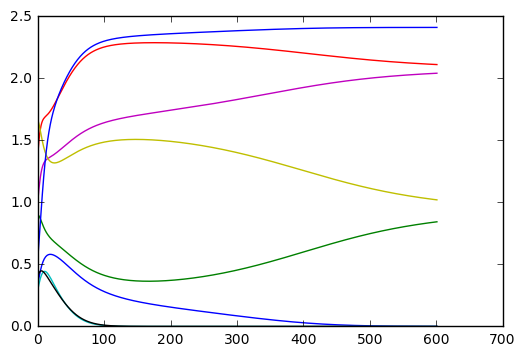

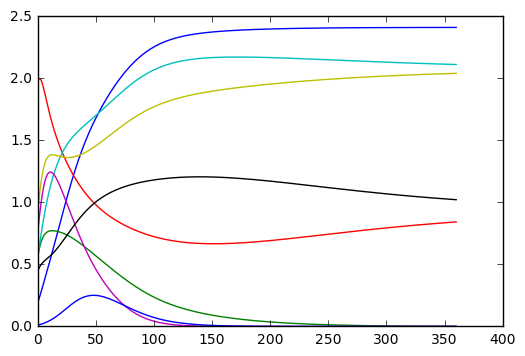

array([[ 0.02,  0.95,  2.06,  0.  ,  2.07,  0.91,  0.02,  2.4 ],
       [ 0.  ,  2.11,  0.84,  0.  ,  2.41,  0.  ,  1.02,  2.04],
       [ 2.04,  1.02,  0.  ,  2.41,  0.  ,  0.84,  2.11,  0.  ],
       [ 0.01,  0.83,  2.12,  0.  ,  2.03,  1.04,  0.  ,  2.41],
       [ 2.41,  0.  ,  1.02,  2.04,  0.  ,  2.11,  0.84,  0.  ],
       [ 0.  ,  2.41,  0.  ,  0.84,  2.11,  0.  ,  2.04,  1.02],
       [ 0.  ,  2.11,  0.84,  0.  ,  2.41,  0.  ,  1.02,  2.04],
       [ 2.04,  0.  ,  2.11,  0.84,  0.  ,  2.41,  0.  ,  1.02],
       [ 0.  ,  0.84,  2.11,  0.  ,  2.04,  1.02,  0.  ,  2.41],
       [ 2.41,  0.  ,  0.84,  2.11,  0.  ,  2.04,  1.02,  0.  ]])

In [6]:
## N = 8, solutions are not symmetric
c = [1,.4,.2,.1,.8,.1,.2,.4]
A = lin.toeplitz(c)
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A,np.matrix([1,1,1,1,1,1,1,1]).T)

[ 9.2 -1.2 -0.1 -0.1 -0.9 -0.9]


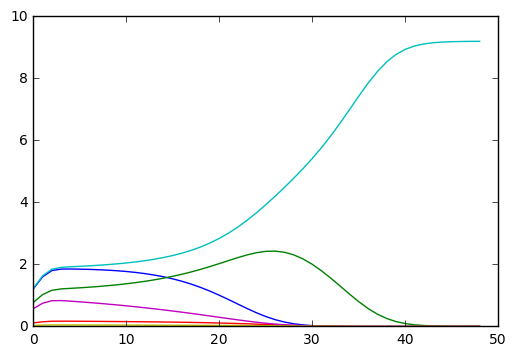

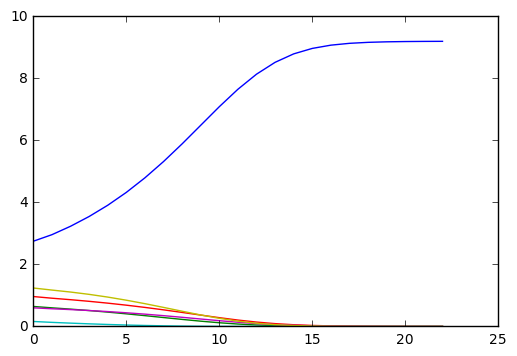

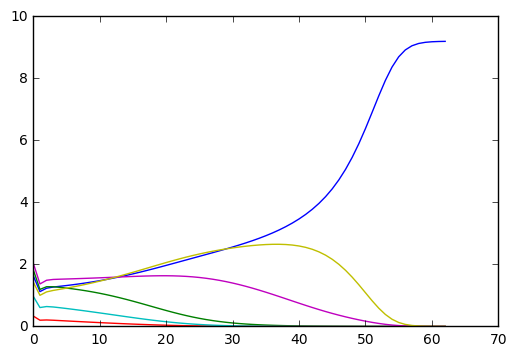

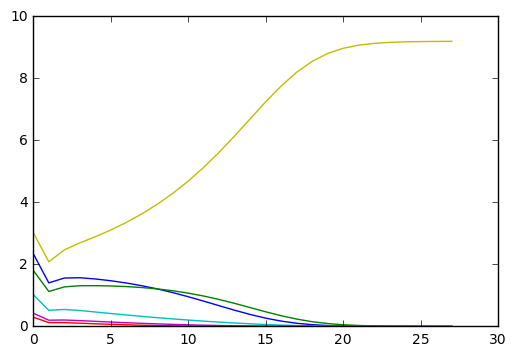

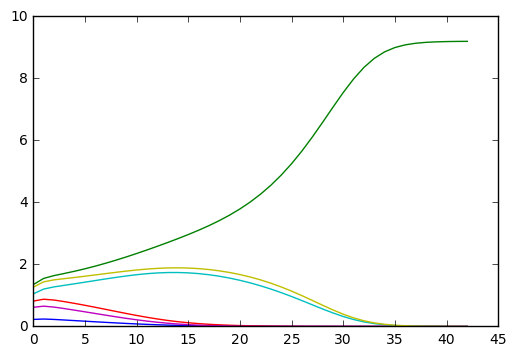

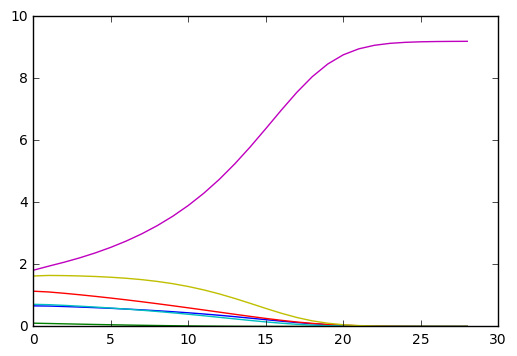

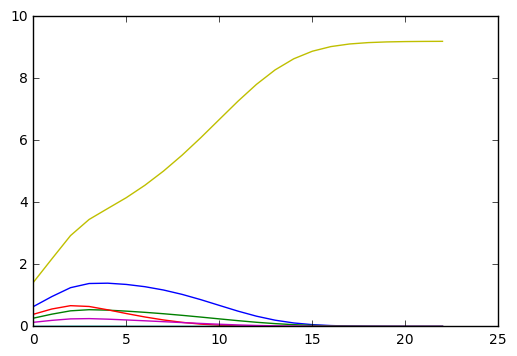

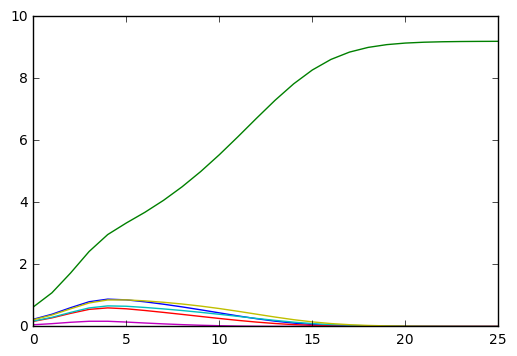

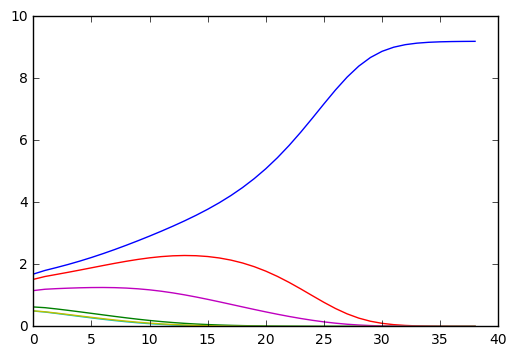

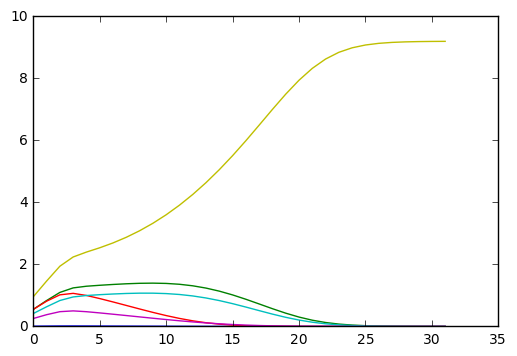

array([[ 0. ,  0. ,  0. ,  9.2,  0. ,  0. ],
       [ 9.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 9.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  9.2],
       [ 0. ,  9.2,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  9.2,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  9.2],
       [ 0. ,  9.2,  0. ,  0. ,  0. ,  0. ],
       [ 9.2,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  9.2]])

In [7]:
## All negative, only one solution
c = [1,1.6,1.5,2.0,1.5,1.6]
A = lin.toeplitz(c)
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A,np.matrix([1,1,1,1,1,1]).T)

In [8]:
## Experiment - Solution
# A = np.array([[4,3,3],[3,4,0],[3,0,4]])
# print(lin.eig(A)[0].round(3).real)
# MonteCarlo_LV(10,A,np.matrix([2,3,2]).T)

[-0.899  5.449  2.45 ]


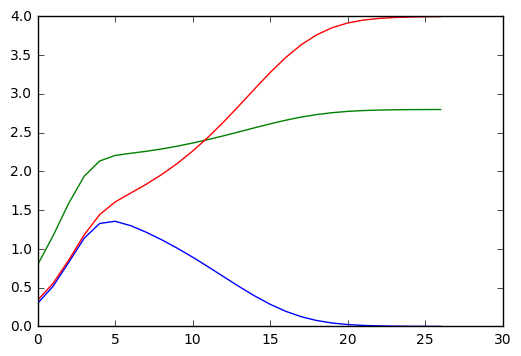

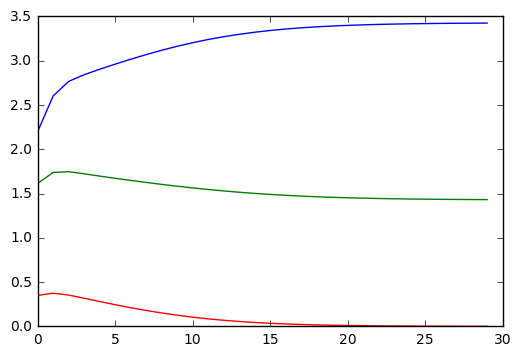

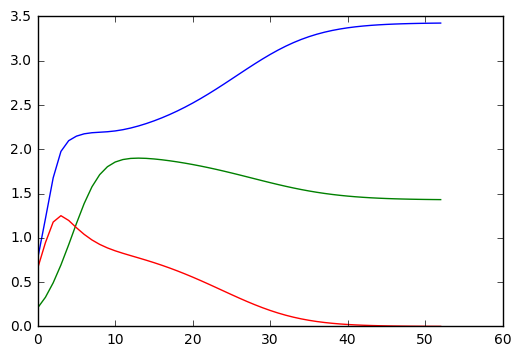

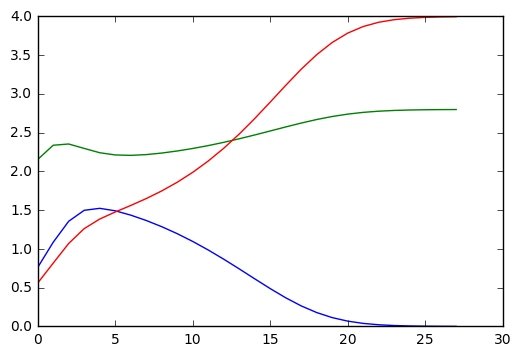

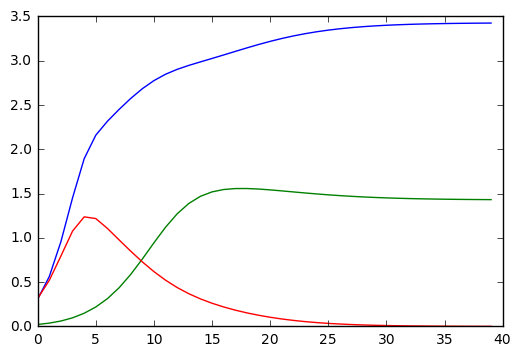

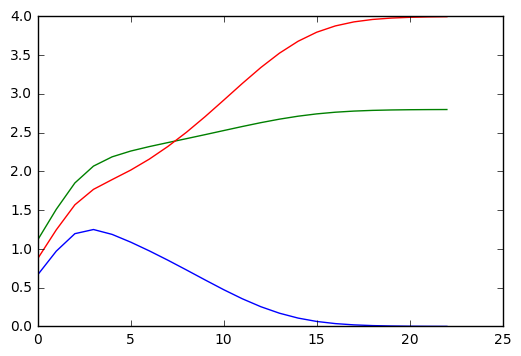

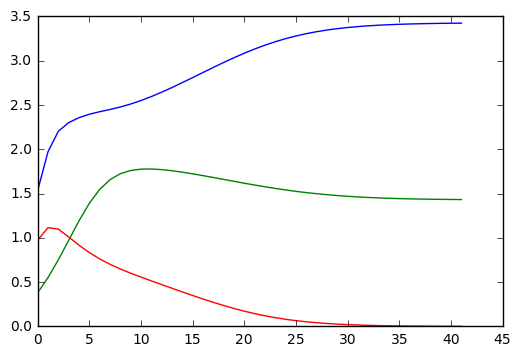

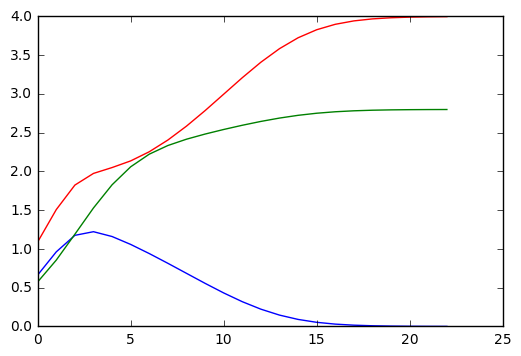

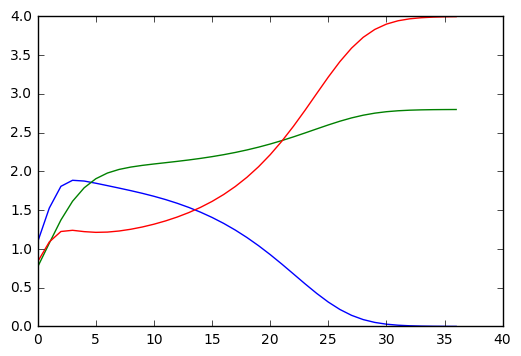

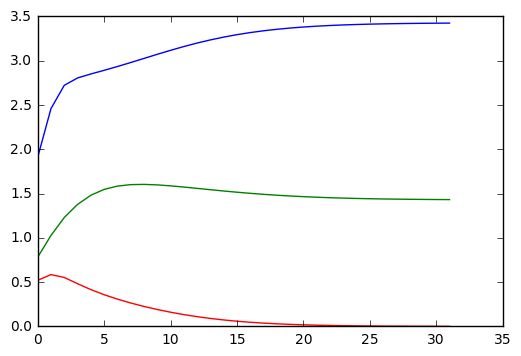

array([[ 0.  ,  2.8 ,  4.  ],
       [ 3.43,  1.43,  0.  ],
       [ 3.43,  1.43,  0.  ],
       [ 0.  ,  2.8 ,  4.  ],
       [ 3.43,  1.43,  0.  ],
       [ 0.  ,  2.8 ,  4.  ],
       [ 3.42,  1.43,  0.  ],
       [ 0.  ,  2.8 ,  4.  ],
       [ 0.  ,  2.8 ,  4.  ],
       [ 3.42,  1.43,  0.  ]])

In [9]:
## Experiment 2 Solution
A = np.array([[2.5,1,3],[1,2.5,0],[3,0,2]])
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A,np.matrix([2,2,1]).T)

[-0.899  5.449  2.45 ]


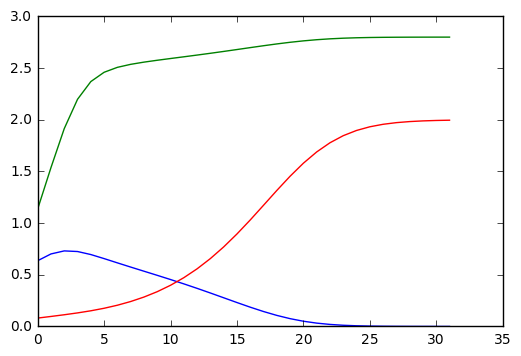

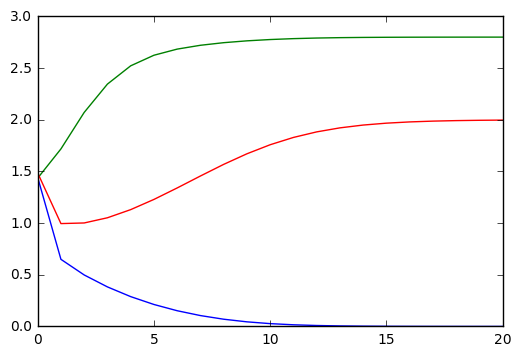

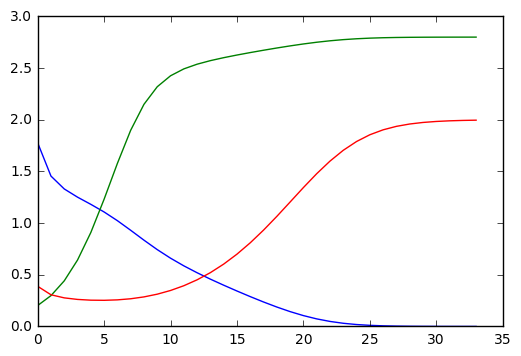

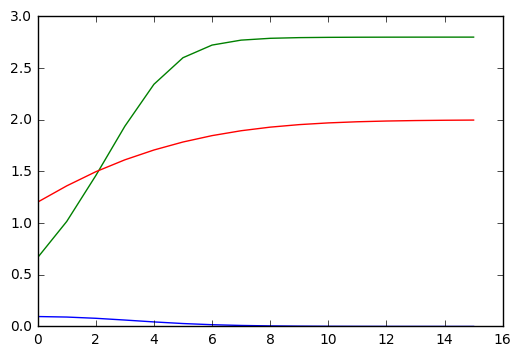

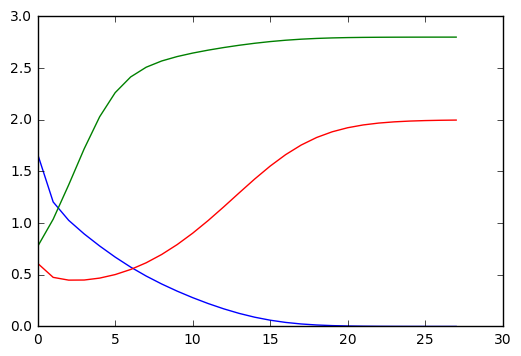

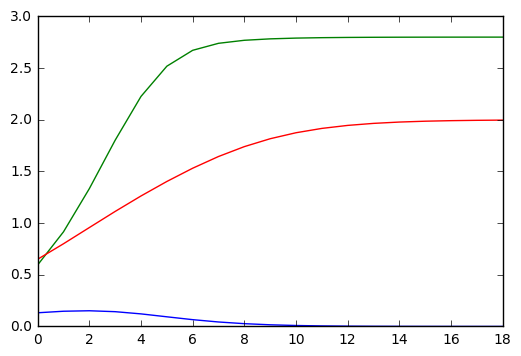

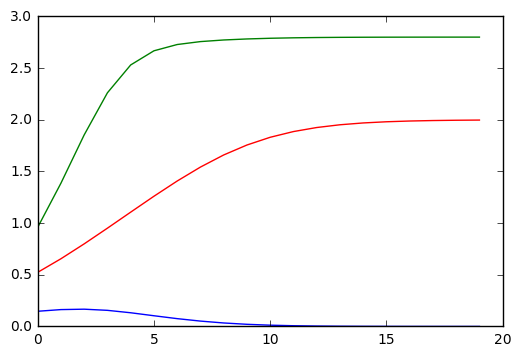

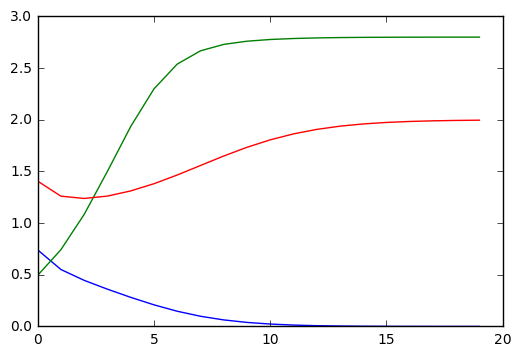

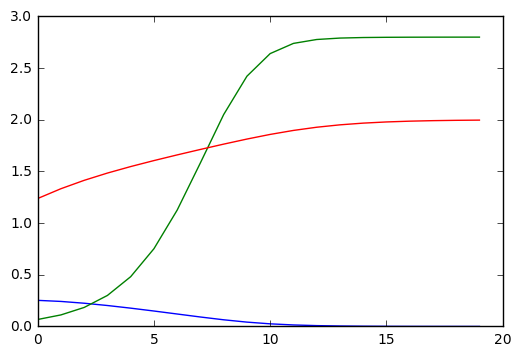

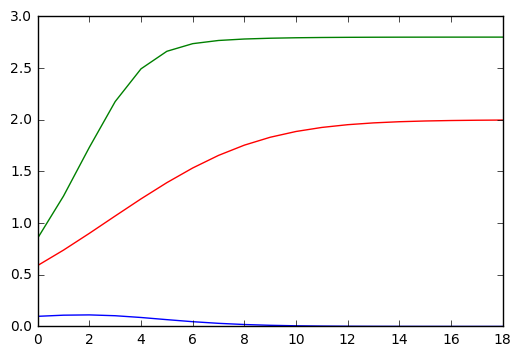

array([[ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ],
       [ 0. ,  2.8,  2. ]])

In [10]:
## Experiment 1 Solution
A = np.array([[2.5,1,3],[1,2.5,0],[3,0,2]])
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A,np.matrix([2,2,-1]).T)

## weird
# A = np.array([[2.5,3,3],[3,2.5,0],[3,0,2]])
# print(lin.eig(A)[0].round(3).real)
# MonteCarlo_LV(10,A,np.matrix([2,2,-1]).T)

[-0.899  5.449  2.45 ]


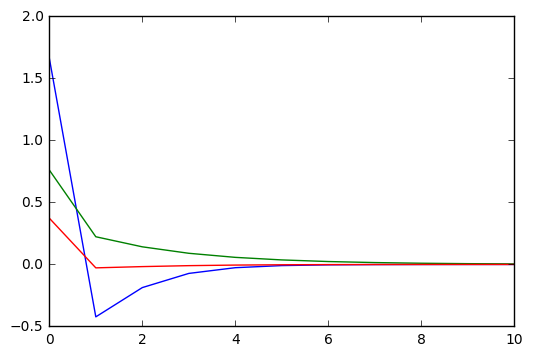

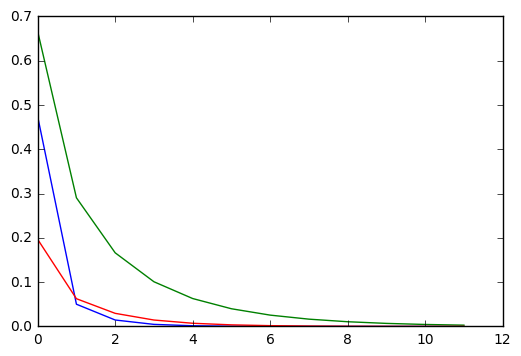

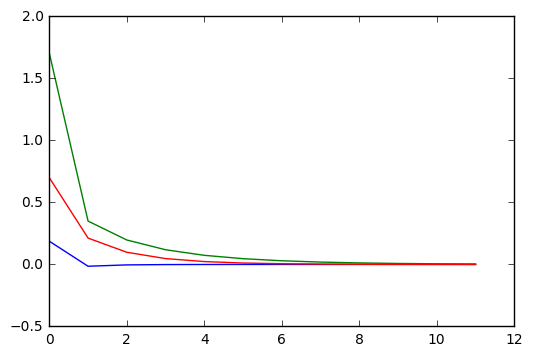

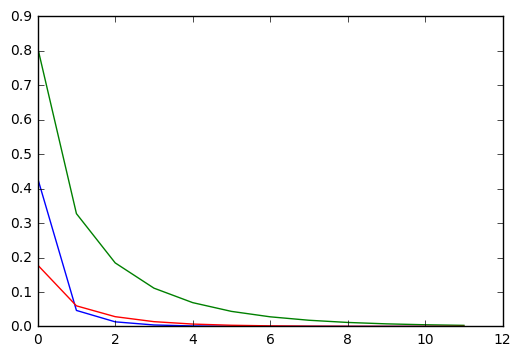

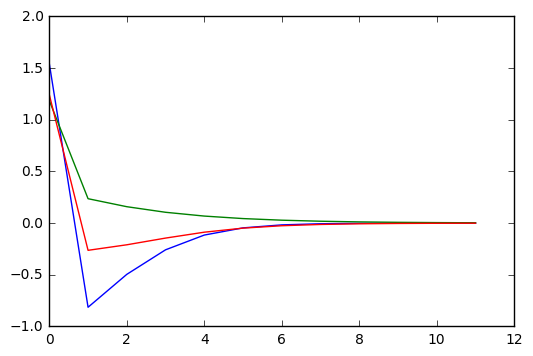

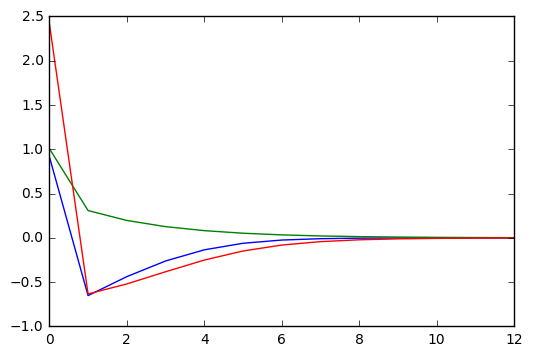

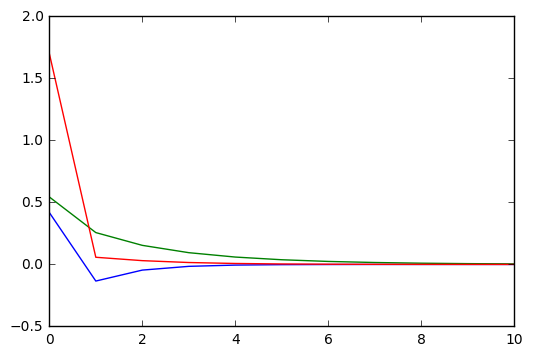

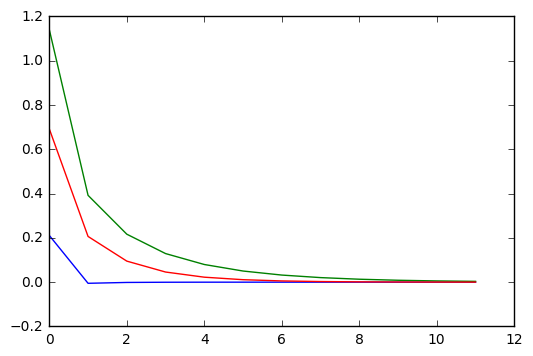

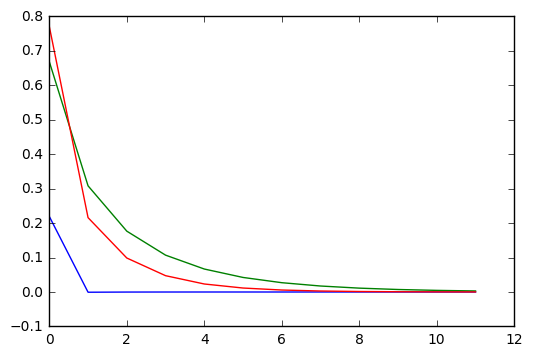

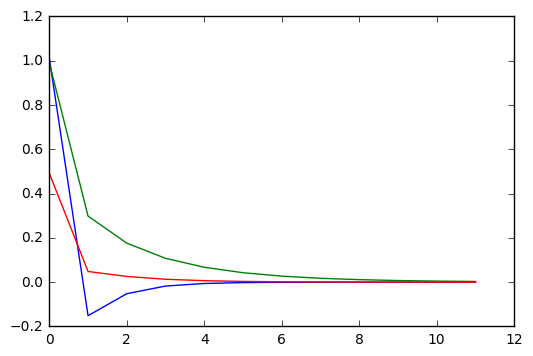

array([[-0.,  0., -0.],
       [ 0.,  0.,  0.],
       [-0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [-0.,  0., -0.],
       [-0.,  0., -0.],
       [-0.,  0.,  0.],
       [-0.,  0.,  0.],
       [-0.,  0.,  0.],
       [-0.,  0.,  0.]])

In [11]:
## Experiment 0 Solution
A = np.array([[2.5,1,3],[1,2.5,0],[3,0,2]])
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A,np.matrix([-1,-1,-1]).T)

In [12]:
## Experiment 0 Solution
# A = np.array([[1,4,3],[4,1,5],[3,5,1]])
# print(lin.eig(A)[0].round(3).real)
# MonteCarlo_LV(1,A,np.matrix([2,2,1]).T)

[-0.899  5.449  2.45 ]


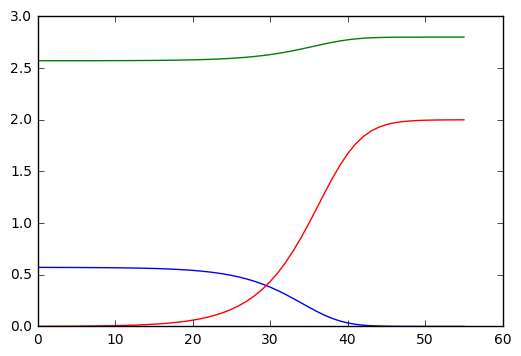

In [13]:
## Experiment 2 Solution
A = np.array([[2.5,1,3],[1,2.5,0],[3,0,2]])
print(lin.eig(A)[0].round(3).real)
## starting point [2,2,-1]
dyn_mat2 = LV_dynamics(A, np.matrix([2,2,-1]).T, [0.57142857,2.57142857,0.001], .0001, .1, 10000)
plt.figure()
for j in range(3):
    plt.plot(dyn_mat2[j,:].tolist()[0])
plt.show()

[ 3.  1.]


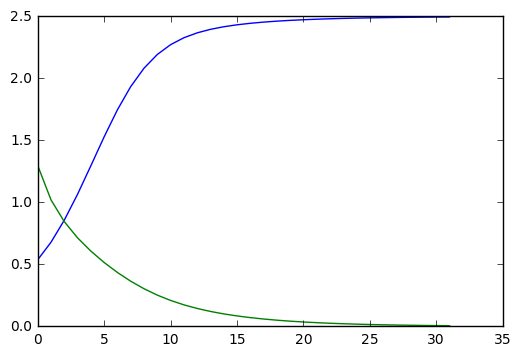

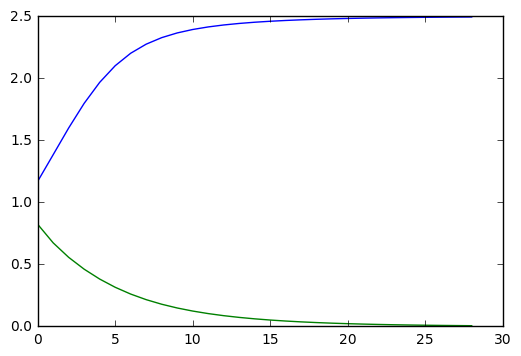

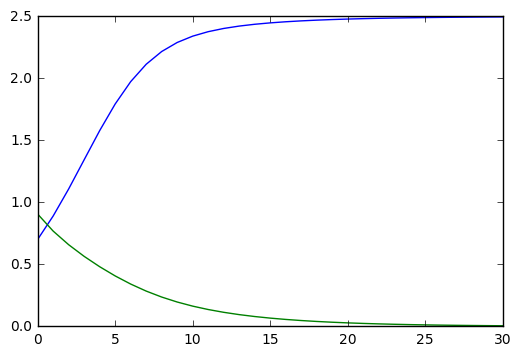

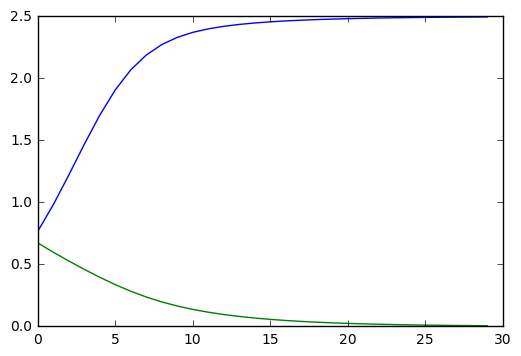

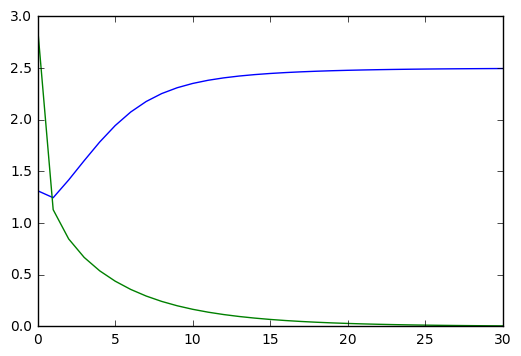

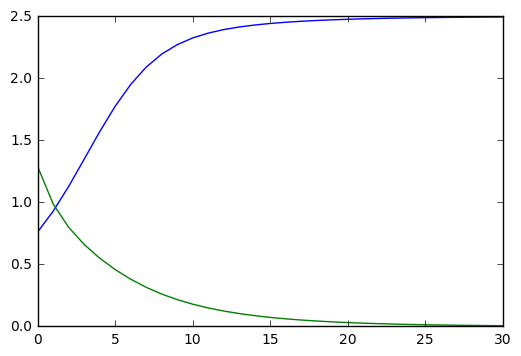

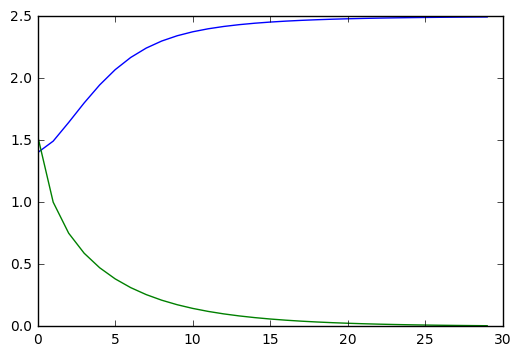

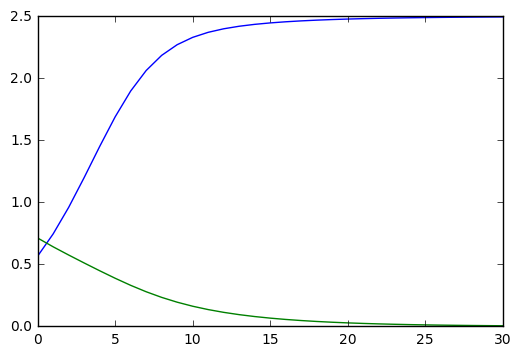

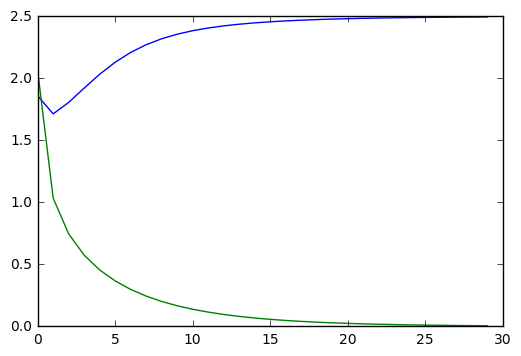

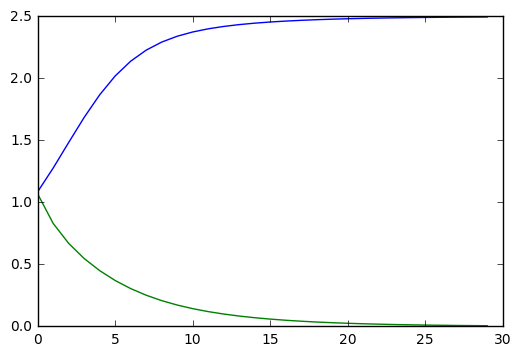

array([[ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01],
       [ 2.5 ,  0.01]])

In [14]:
## Experiment
A = np.array([[2,1],[1,2]])
print(lin.eig(A)[0].round(3).real)
MonteCarlo_LV(10,A,np.matrix([3,-1]).T)

In [15]:
A = np.array([[1,.9,.9],[.9,1,0],[.9,0,1]])
print(lin.eig(A)[0].round(3).real)

[ 2.273 -0.273  1.   ]


[ 1.5  0.5  3.  -1. ]
[[ 1.]
 [ 1.]
 [ 3.]
 [ 0.]]
[[ 1.]
 [ 1.]
 [ 0.]
 [ 3.]]
[[ 1.]
 [ 1.]
 [ 0.]
 [ 0.]]
[[ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


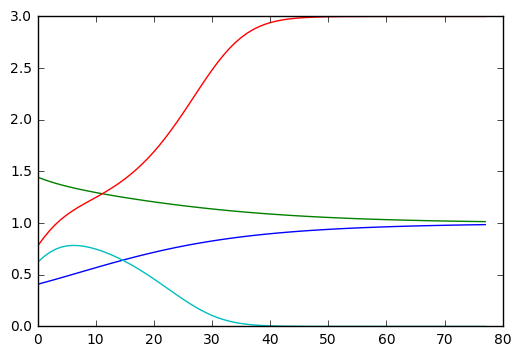

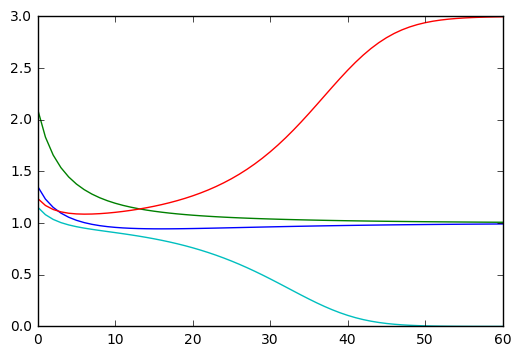

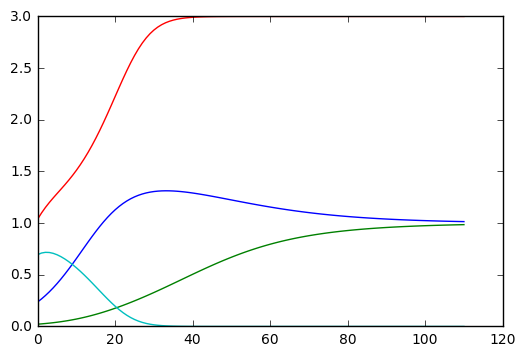

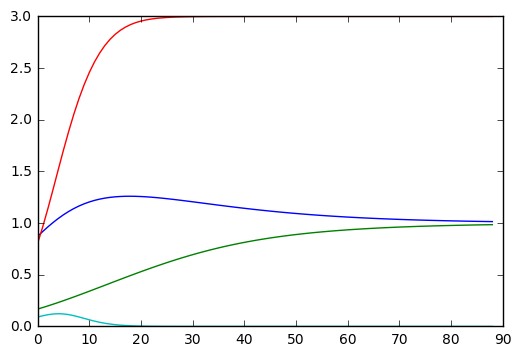

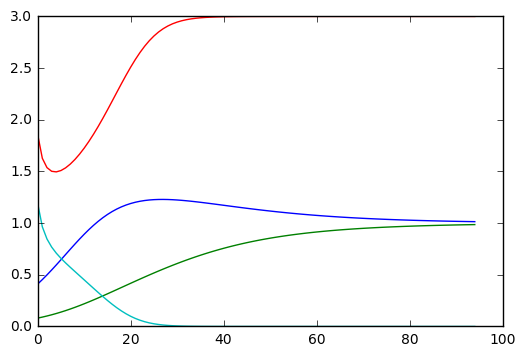

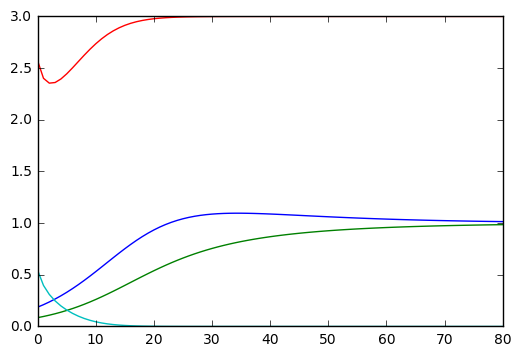

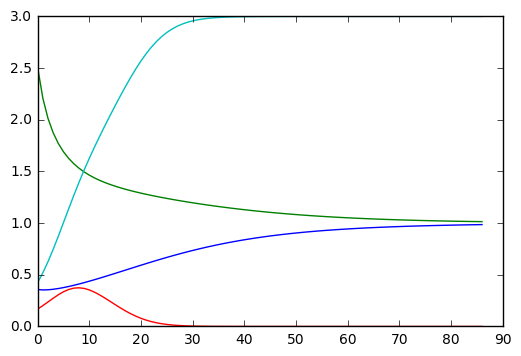

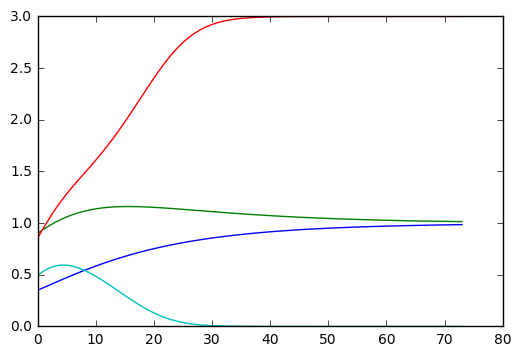

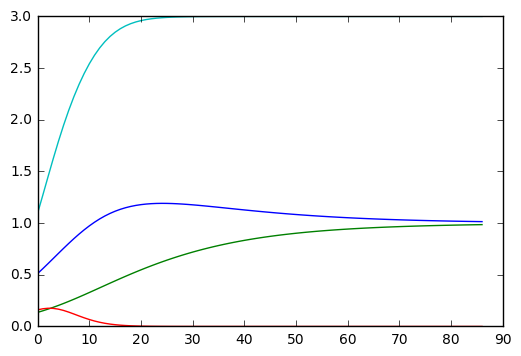

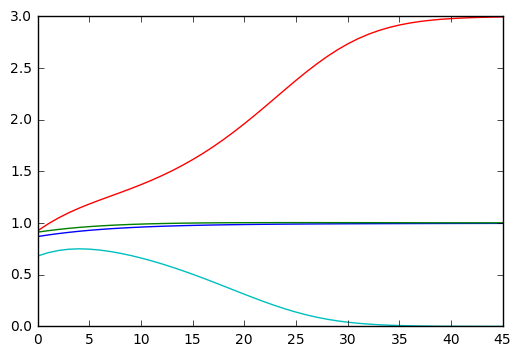

array([[ 0.99,  1.01,  3.  ,  0.  ],
       [ 0.99,  1.01,  3.  ,  0.  ],
       [ 1.01,  0.99,  3.  ,  0.  ],
       [ 1.01,  0.99,  3.  ,  0.  ],
       [ 1.01,  0.99,  3.  ,  0.  ],
       [ 1.01,  0.99,  3.  ,  0.  ],
       [ 0.99,  1.01,  0.  ,  3.  ],
       [ 0.99,  1.01,  3.  ,  0.  ],
       [ 1.01,  0.99,  0.  ,  3.  ],
       [ 1.  ,  1.  ,  3.  ,  0.  ]])

In [16]:
## {1,2,3}, {1,2,4} max in B 
## {1,2,3}, {1,2,4} max in C 
## Both are competitive wrt (A,p)
## Both {1,2,3}, {1,2,4} solve LCP

A = np.matrix([[1,.5,0,0],
               [.5,1,0,0],
               [0,0,1,2],
               [0,0,2,1]])
I = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
p = np.matrix([[1],[1],[1],[1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [0,1]
S4 = [2,3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
print(lin.eig(A)[0].round(3).real)
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(Q3.T*lin.inv(A3)*Q3*A*p)
print(Q4.T*lin.inv(A4)*Q4*A*p)

MonteCarlo_LV(10,A,np.matrix([1,1,1,1]).T)

[ 1.5  0.5  3.  -1. ]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 0.]]
[[ 1.]
 [ 1.]
 [ 0.]
 [-1.]]
[[ 1.]
 [ 1.]
 [ 0.]
 [ 0.]]
[[ 0.]
 [ 0.]
 [-1.]
 [ 1.]]


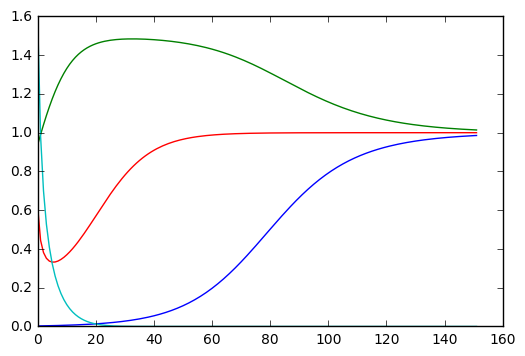

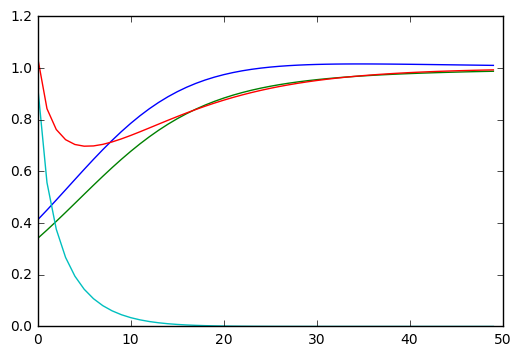

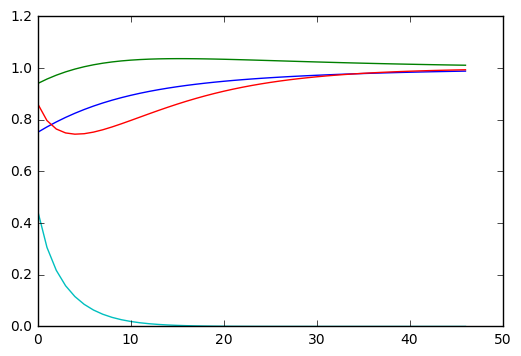

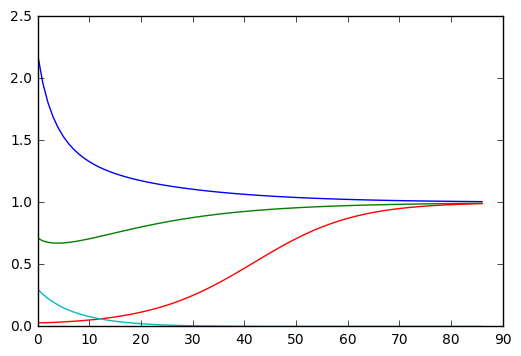

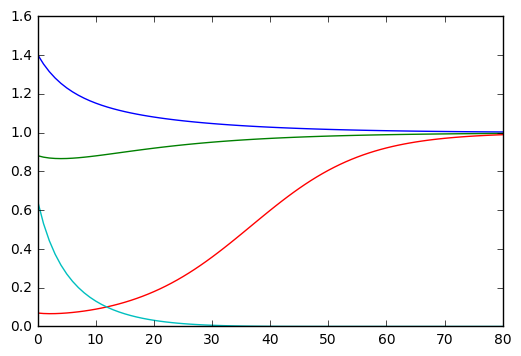

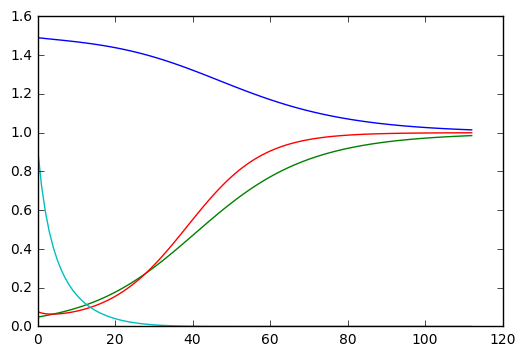

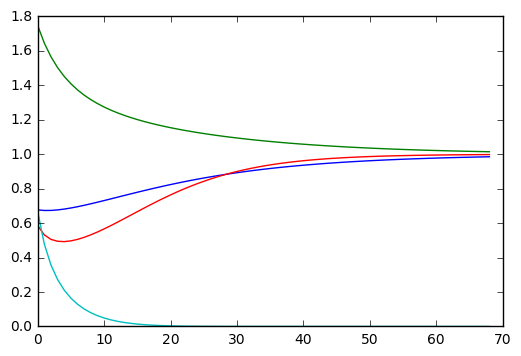

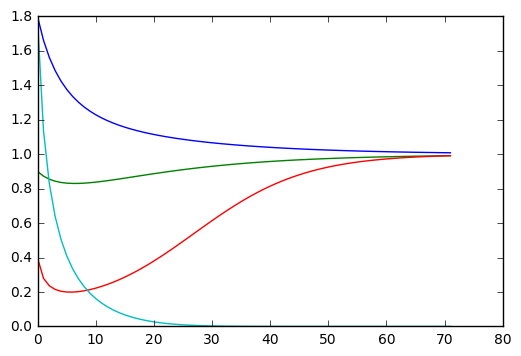

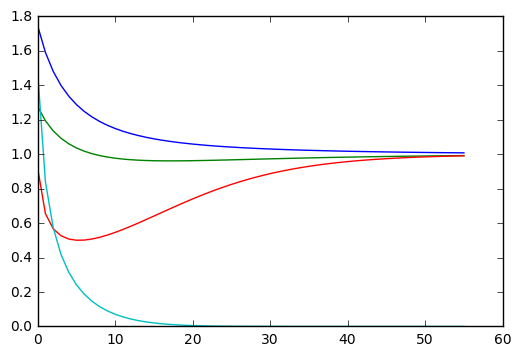

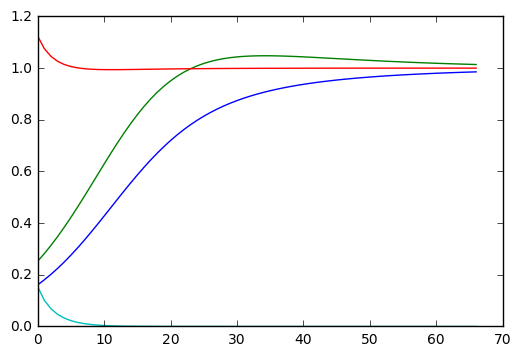

array([[ 0.99,  1.01,  1.  ,  0.  ],
       [ 1.01,  0.99,  0.99,  0.  ],
       [ 0.99,  1.01,  0.99,  0.  ],
       [ 1.01,  0.99,  0.99,  0.  ],
       [ 1.  ,  1.  ,  0.99,  0.  ],
       [ 1.01,  0.98,  1.  ,  0.  ],
       [ 0.99,  1.01,  1.  ,  0.  ],
       [ 1.01,  0.99,  0.99,  0.  ],
       [ 1.01,  0.99,  0.99,  0.  ],
       [ 0.99,  1.01,  1.  ,  0.  ]])

In [17]:
## {1,2,3}, {1,2,4} max in B 
## {1,2,3}, {1,2} max in C 
## Since {1,2} < {1,2,3} only {1,2,3} is competitive wrt (A,p)
## Only {1,2,3} solves LCP
# Favorite number 1

A = np.matrix([[1,.5,0,0],
               [.5,1,0,0],
               [0,0,1,2],
               [0,0,2,1]])
I = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
p = np.matrix([[1],[1],[-1],[1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [0,1]
S4 = [2,3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
print(lin.eig(A)[0].round(3).real)
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(Q3.T*lin.inv(A3)*Q3*A*p)
print(Q4.T*lin.inv(A4)*Q4*A*p)


MonteCarlo_LV(10,A,np.matrix([1,1,-1,1]).T)

[ 1.5  0.5  3.  -1. ]
[[ 1.]
 [-1.]
 [ 3.]
 [ 0.]]
[[ 1.]
 [-1.]
 [ 0.]
 [ 3.]]
[[ 1.]
 [-1.]
 [ 0.]
 [ 0.]]
[[ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


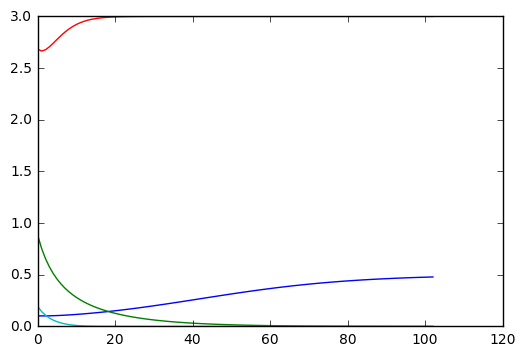

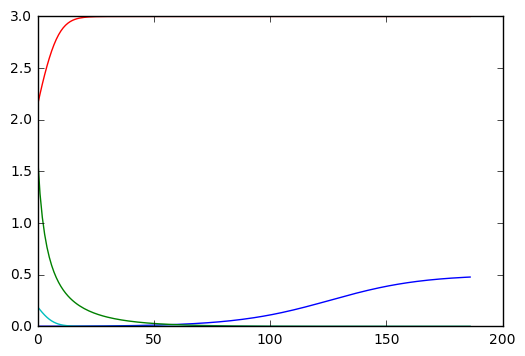

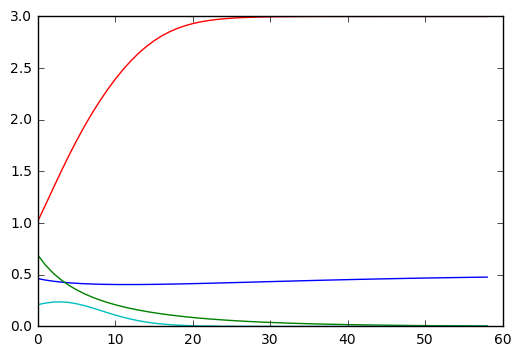

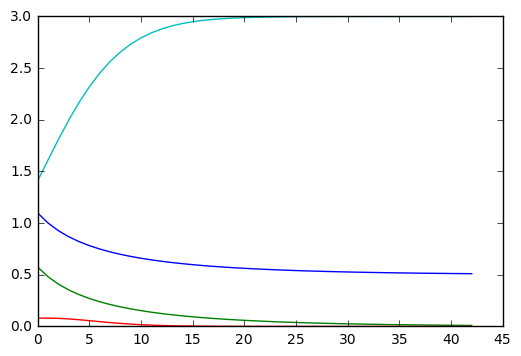

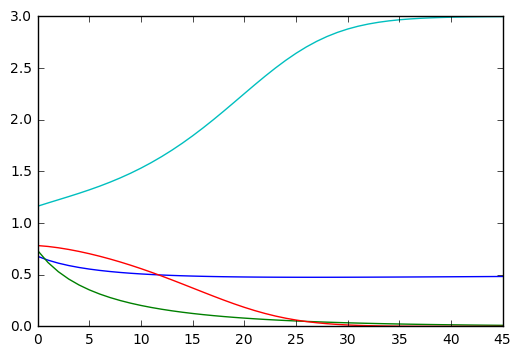

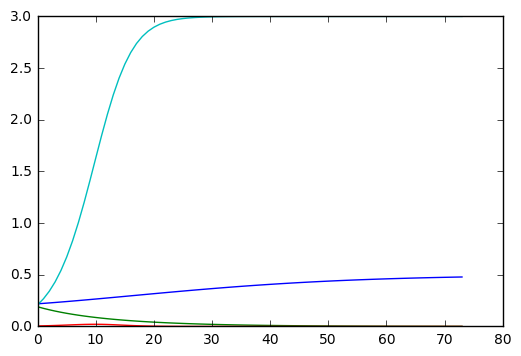

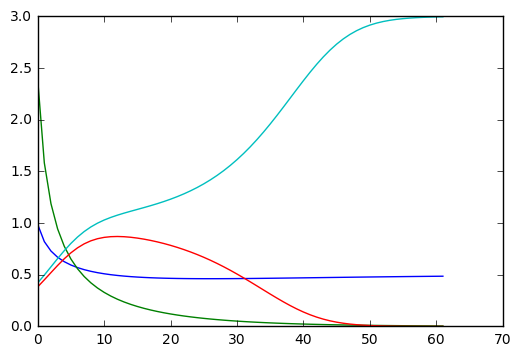

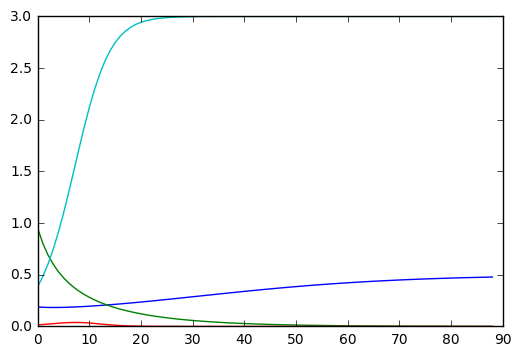

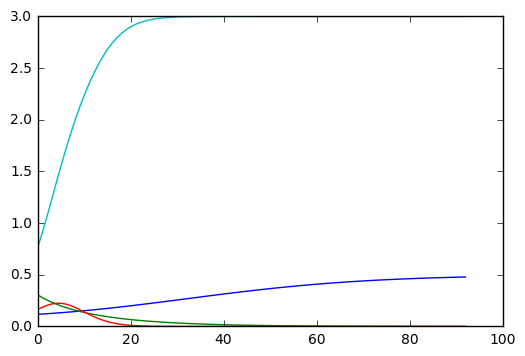

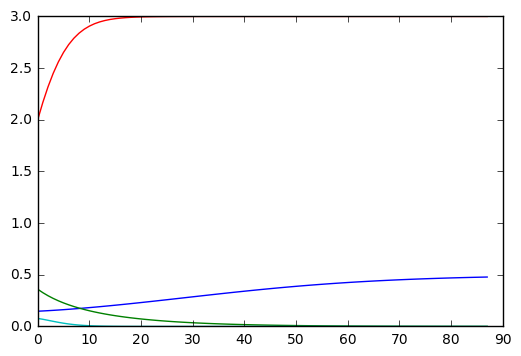

array([[ 0.48,  0.  ,  3.  ,  0.  ],
       [ 0.48,  0.  ,  3.  ,  0.  ],
       [ 0.48,  0.  ,  3.  ,  0.  ],
       [ 0.51,  0.01,  0.  ,  3.  ],
       [ 0.48,  0.01,  0.  ,  3.  ],
       [ 0.48,  0.  ,  0.  ,  3.  ],
       [ 0.49,  0.  ,  0.  ,  3.  ],
       [ 0.48,  0.  ,  0.  ,  3.  ],
       [ 0.48,  0.  ,  0.  ,  3.  ],
       [ 0.48,  0.  ,  3.  ,  0.  ]])

In [18]:
## {1,2,3}, {1,2,4} max in B 
## {1,3}, {1,4} max in C 
## Both competitive wrt (A,p)
## Both {1,3} and {1,4} solve LCP

A = np.matrix([[1,.5,0,0],
               [.5,1,0,0],
               [0,0,1,2],
               [0,0,2,1]])
I = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
p = np.matrix([[1],[-1],[1],[1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [0,1]
S4 = [2,3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
print(lin.eig(A)[0].round(3).real)
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(Q3.T*lin.inv(A3)*Q3*A*p)
print(Q4.T*lin.inv(A4)*Q4*A*p)

MonteCarlo_LV(10,A,np.matrix([1,-1,1,1]).T)

[ 4.643 -2.309  0.5    1.166]
[[ 0.86666667]
 [ 0.86666667]
 [-1.2       ]
 [ 0.        ]]
[[ 0.38461538]
 [ 0.38461538]
 [ 0.        ]
 [ 0.36153846]]
[[ 0.        ]
 [ 0.        ]
 [ 1.66666667]
 [-1.43333333]]
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 1.9]]
[[-5.]
 [-0.]]
[[-5.]
 [ 0.]]
[[ 0.   ]
 [ 0.   ]
 [ 1.667]
 [-1.433]]


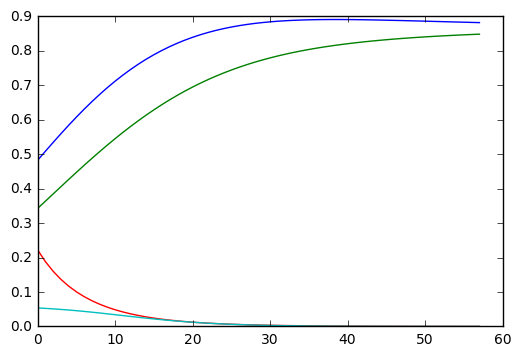

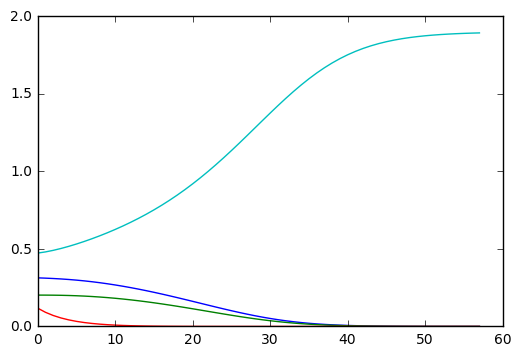

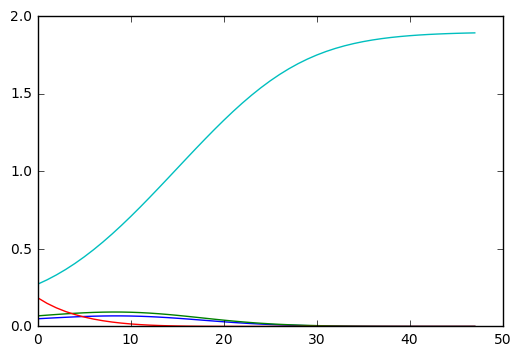

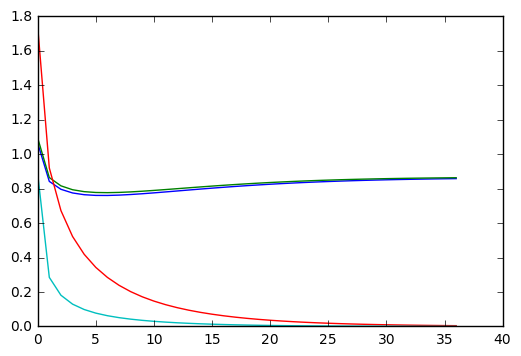

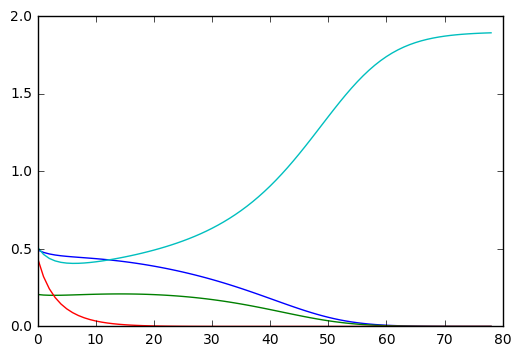

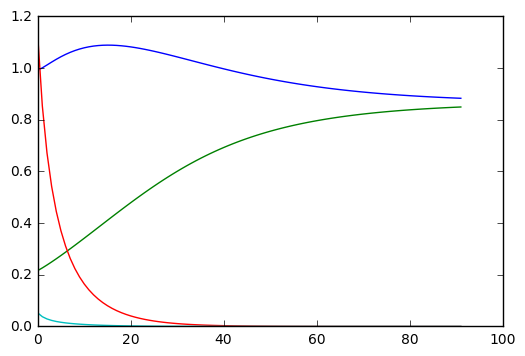

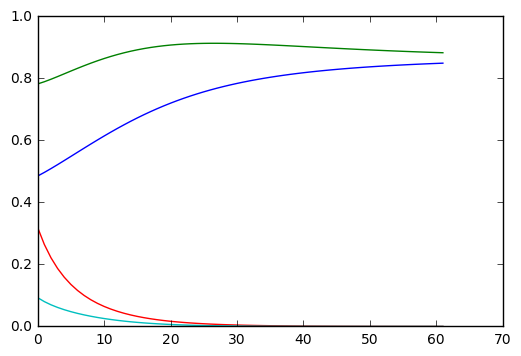

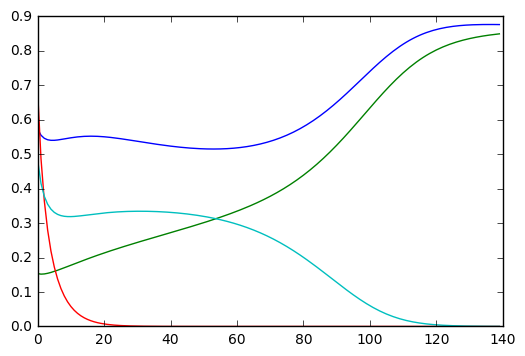

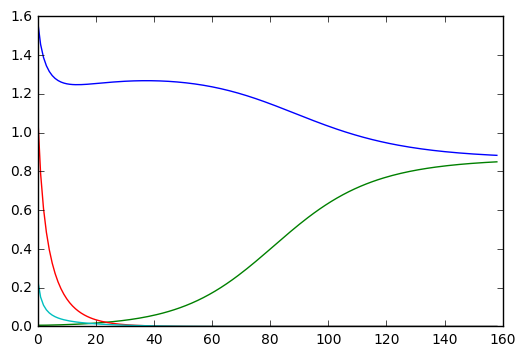

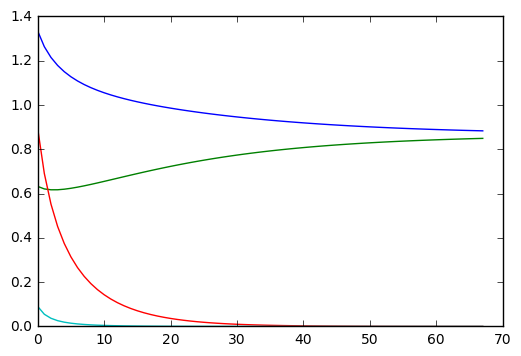

array([[ 0.88,  0.85,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.89],
       [ 0.  ,  0.  ,  0.  ,  1.89],
       [ 0.86,  0.86,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.89],
       [ 0.88,  0.85,  0.  ,  0.  ],
       [ 0.85,  0.88,  0.  ,  0.  ],
       [ 0.88,  0.85,  0.  ,  0.  ],
       [ 0.88,  0.85,  0.  ,  0.  ],
       [ 0.88,  0.85,  0.  ,  0.  ]])

In [19]:
## {1,2,3}, {4} max in B 
## {1,2}, {4} max in C 
## Both competitive wrt (A,p)
## Both {1,2} and {4} solve LCP

A = np.matrix([[1,.5,0,2],
               [.5,1,0,2],
               [0,0,1,2],
               [2,2,2,1]])
I = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
p = np.matrix([[1],[1],[-1],[-.1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [2,3]
S4 = [3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
Av1 = A[np.ix_(S,[0])]
Av2 = A[np.ix_(S,[1])]
Av3 = A[np.ix_(S,[2])]
Av4 = A[np.ix_(S,[3])]
print(lin.eig(A)[0].round(3).real)
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(lin.pinv(P3*A*P3)*A*p)
print(lin.pinv(P4*A*P4)*A*p)

p3 = lin.pinv(P3*A*P3)*A*p
p4 = lin.pinv(P4*A*P4)*A*p
print((A3*Q3*(p3-p4)).round(3))
print(((A3-A3*Q3*lin.pinv(P4*A*P4)*Q3.T*A3)*Q3*p3).round(3))
print(p3.round(3))

MonteCarlo_LV(10,A,np.matrix([1,1,-1,-.1]).T)

[ 4.643 -2.309  0.5    1.166]
[[ 0.86666667]
 [ 0.86666667]
 [ 0.8       ]
 [ 0.        ]]
[[ 1.61538462]
 [ 1.61538462]
 [ 0.        ]
 [-0.56153846]]
[[ 0.        ]
 [ 0.        ]
 [ 3.66666667]
 [-1.43333333]]
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 5.9]]
[[-11.]
 [ -0.]]
[[-11.]
 [  0.]]
[[ 0.   ]
 [ 0.   ]
 [ 3.667]
 [-1.433]]


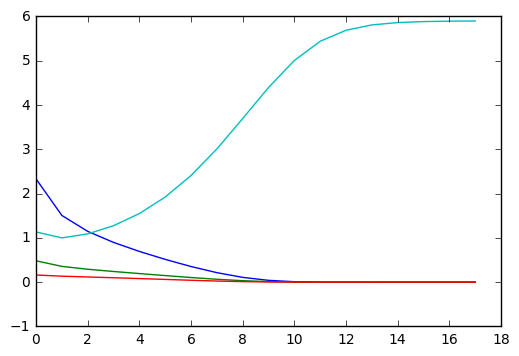

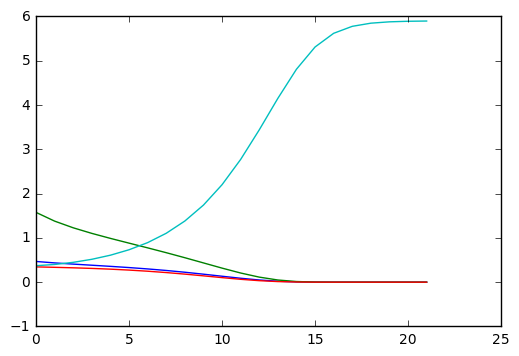

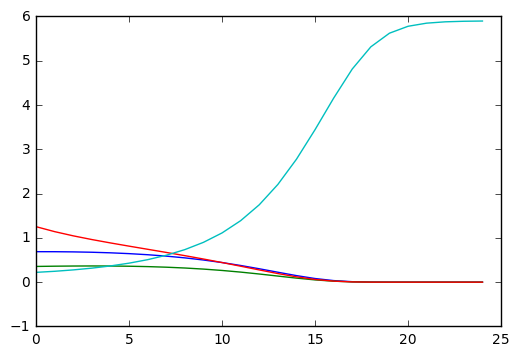

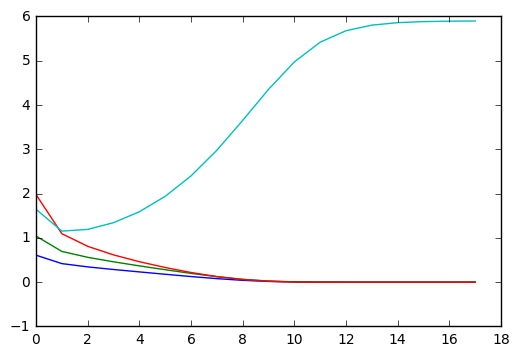

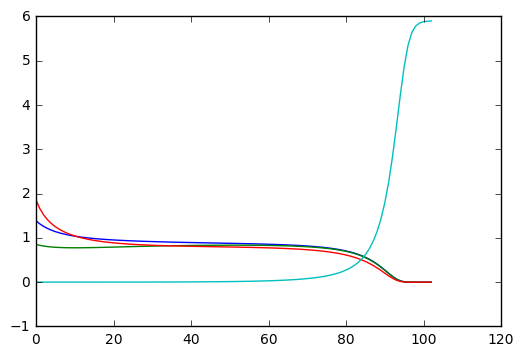

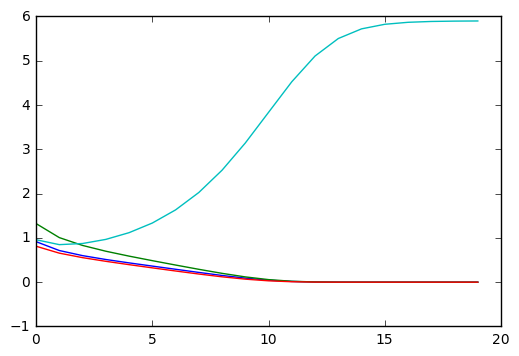

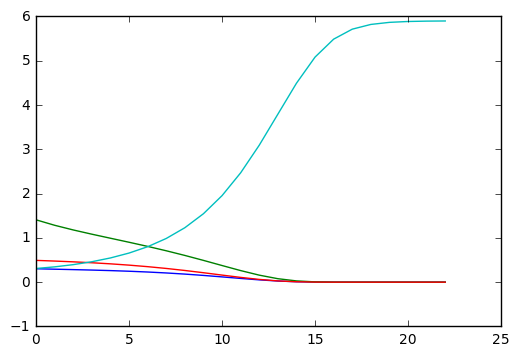

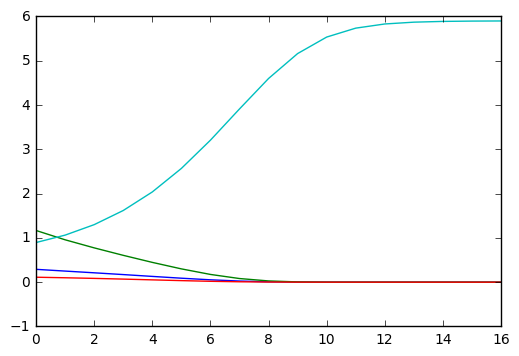

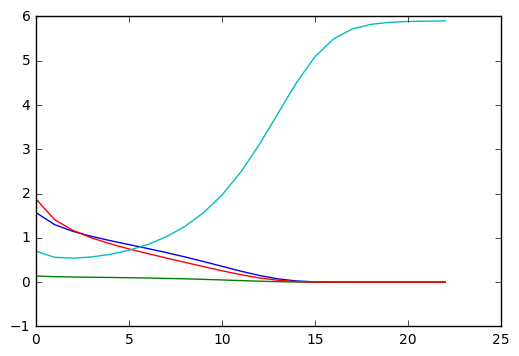

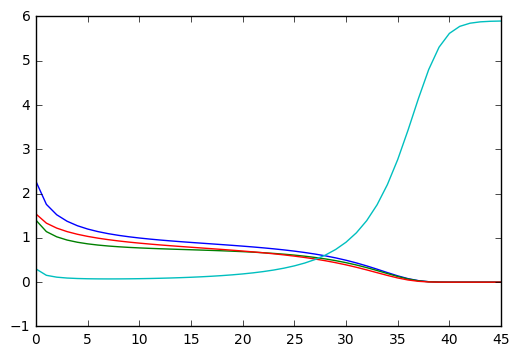

array([[-0. , -0. ,  0. ,  5.9],
       [ 0. ,  0. , -0. ,  5.9],
       [ 0. ,  0. , -0. ,  5.9],
       [-0. , -0. ,  0. ,  5.9],
       [ 0. ,  0. , -0. ,  5.9],
       [-0. , -0. ,  0. ,  5.9],
       [-0. , -0. ,  0. ,  5.9],
       [-0. , -0. ,  0. ,  5.9],
       [-0. , -0. ,  0. ,  5.9],
       [ 0. ,  0. , -0. ,  5.9]])

In [20]:
## {1,2,3}, {4} max in B 
## {1,2,3}, {4} max in C 
## Only {4} is competitive wrt (A,p)
## Only {4} solves LCP
# Favorite number 2
# Note the only change is in p from above...

A = np.matrix([[1,.5,0,2],
               [.5,1,0,2],
               [0,0,1,2],
               [2,2,2,1]])
I = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
p = np.matrix([[1],[1],[1],[-.1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [2,3]
S4 = [3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
Av1 = A[np.ix_(S,[0])]
Av2 = A[np.ix_(S,[1])]
Av3 = A[np.ix_(S,[2])]
Av4 = A[np.ix_(S,[3])]
print(lin.eig(A)[0].round(3).real)
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(lin.pinv(P3*A*P3)*A*p)
print(lin.pinv(P4*A*P4)*A*p)

p3 = lin.pinv(P3*A*P3)*A*p
p4 = lin.pinv(P4*A*P4)*A*p
print((A3*Q3*(p3-p4)).round(3))
print(((A3-A3*Q3*lin.pinv(P4*A*P4)*Q3.T*A3)*Q3*p3).round(3))
print(p3.round(3))

MonteCarlo_LV(10,A,np.matrix([1,1,1,-.1]).T)

In [29]:
## some algebra

A = np.matrix([[1,.5,0,2],
               [.5,1,0,2],
               [0,0,1,2],
               [2,2,2,1]])

p = np.matrix([[1],[1],[1],[-.1]])

I = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [2,3]
S4 = [3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
Av1 = A[np.ix_(S,[0])]
Av2 = A[np.ix_(S,[1])]
Av3 = A[np.ix_(S,[2])]
Av4 = A[np.ix_(S,[3])]
print(lin.eig(A)[0].round(3).real)
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(lin.pinv(P3*A*P3)*A*p)
print(lin.pinv(P4*A*P4)*A*p)

p1 = lin.pinv(P1*A*P1)*A*p
p3 = lin.pinv(P3*A*P3)*A*p
p4 = lin.pinv(P4*A*P4)*A*p
print((A3*Q3*(p3-p4)).round(3))
print(((A3-A3*Q3*lin.pinv(P4*A*P4)*Q3.T*A3)*Q3*p3).round(3))
print(p1.round(6))

A*p4

[ 4.643 -2.309  0.5    1.166]
[[ 0.86666667]
 [ 0.86666667]
 [ 0.8       ]
 [ 0.        ]]
[[ 1.61538462]
 [ 1.61538462]
 [ 0.        ]
 [-0.56153846]]
[[ 0.        ]
 [ 0.        ]
 [ 3.66666667]
 [-1.43333333]]
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 5.9]]
[[-11.]
 [ -0.]]
[[-11.]
 [  0.]]
[[ 0.866667]
 [ 0.866667]
 [ 0.8     ]
 [ 0.      ]]


matrix([[ 11.8],
        [ 11.8],
        [ 11.8],
        [  5.9]])

In [154]:
A = np.matrix([[2,1,1,2],
               [-1,2,0,2],
               [0,0,2,2],
               [2,2,2,2]])

A = np.matrix([[3,0,0,0],
               [3,1,0,-3],
               [0,3,1,0],
               [0,0,3,1]])


lin.det(A)
sub = [1,2]
lin.det(A[np.ix_(sub,sub)])
#lin.eig(A)[0].round(3)

1.0

[ 5.485+0.j -1.117+0.j  2.000+0.j  1.632+0.j]
[[ 1.]
 [ 2.]
 [ 2.]
 [ 0.]]
[[ 1.66666667]
 [ 2.        ]
 [ 0.        ]
 [ 0.33333333]]
[[ 0. ]
 [ 0. ]
 [ 1.5]
 [ 1.5]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 4.]]
[[-2.]
 [-2.]]
[[ 0.]
 [ 0.]]
[[ 0. ]
 [ 0. ]
 [ 1.5]
 [ 1.5]]


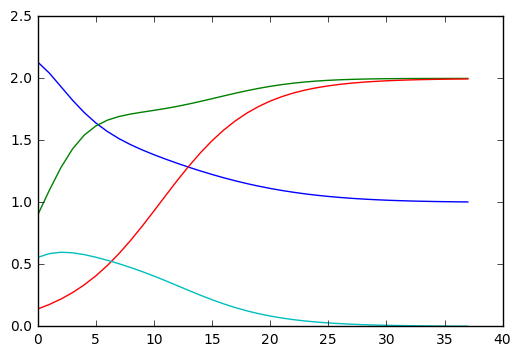

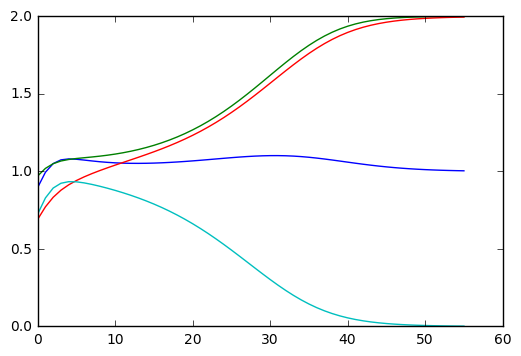

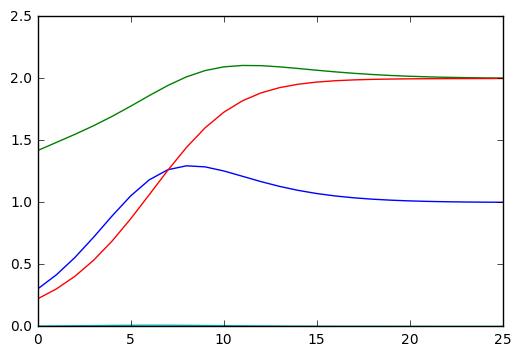

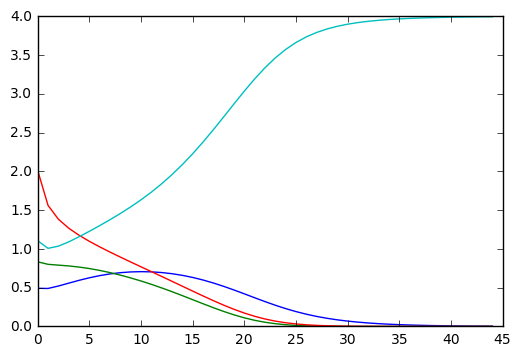

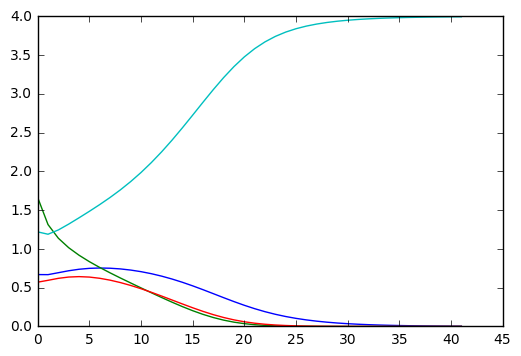

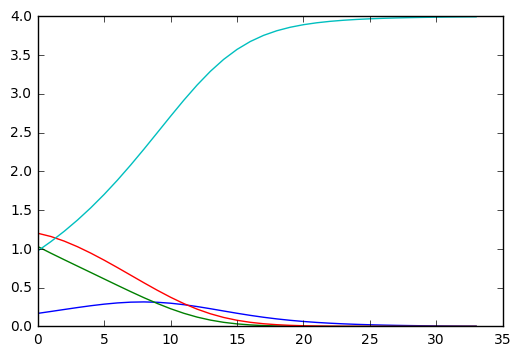

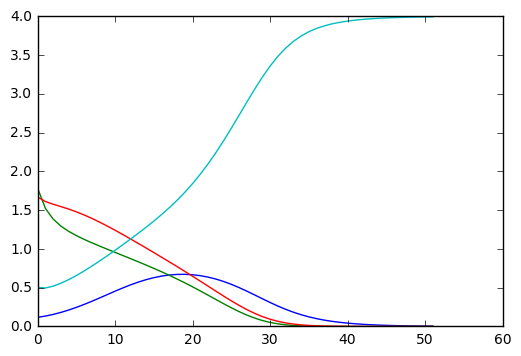

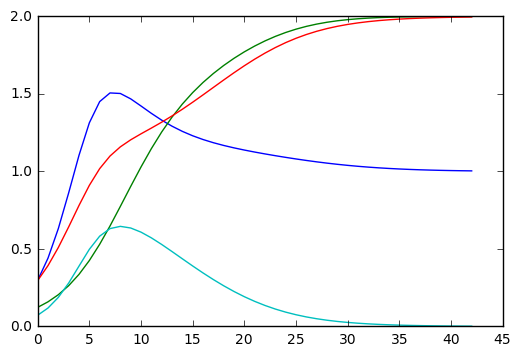

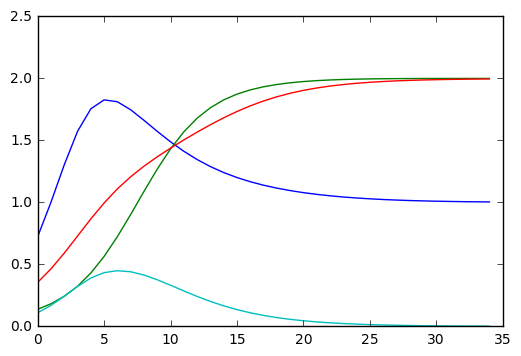

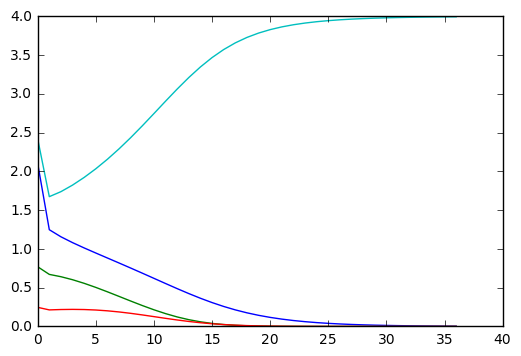

array([[ 1.,  2.,  2.,  0.],
       [ 1.,  2.,  2.,  0.],
       [ 1.,  2.,  2.,  0.],
       [ 0.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  4.],
       [ 0.,  0.,  0.,  4.],
       [ 1.,  2.,  2.,  0.],
       [ 1.,  2.,  2.,  0.],
       [ 0.,  0.,  0.,  4.]])

In [146]:
## {1,2,3}, {4} max in B 
## {1,2,3}, {4} max in C 
## Both {1,2,3} and {4} is competitive wrt (A,p)
## Both {1,2,3} and {4} solves LCP
# A is a real matrix

A = np.matrix([[2,1,1,2],
               [-1,2,0,2],
               [0,0,2,2],
               [2,2,2,2]])
I = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
p = np.matrix([[1],[1],[1],[1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [2,3]
S4 = [3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
Av1 = A[np.ix_(S,[0])]
Av2 = A[np.ix_(S,[1])]
Av3 = A[np.ix_(S,[2])]
Av4 = A[np.ix_(S,[3])]
print(lin.eig(A)[0].round(3))
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(lin.pinv(P3*A*P3)*A*p)
print(lin.pinv(P4*A*P4)*A*p)

p3 = lin.pinv(P3*A*P3)*A*p
p4 = lin.pinv(P4*A*P4)*A*p
print((A3*Q3*(p3-p4)).round(3))
print(((A3-A3*Q3*lin.pinv(P4*A*P4)*Q3.T*A3)*Q3*p3).round(3))
print(p3.round(3))

MonteCarlo_LV(10,A,np.matrix([1,1,1,1]).T)

[-2.0+0.j     2.5+2.598j  2.5-2.598j  3.0+0.j   ]
[[ 1.]
 [-2.]
 [10.]
 [ 0.]]
[[  1.]
 [ 10.]
 [  0.]
 [  4.]]
[[ 1.]
 [ 0.]
 [ 4.]
 [ 0.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 4.]]
[[ 3.]
 [ 4.]]
[[ 3.]
 [ 4.]]
[[ 1.]
 [ 0.]
 [ 4.]
 [ 0.]]


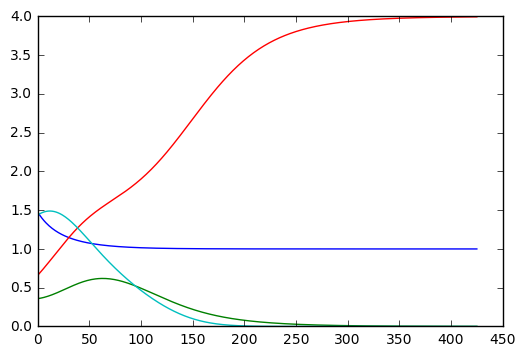

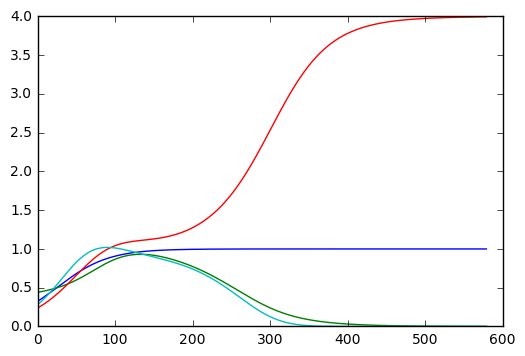

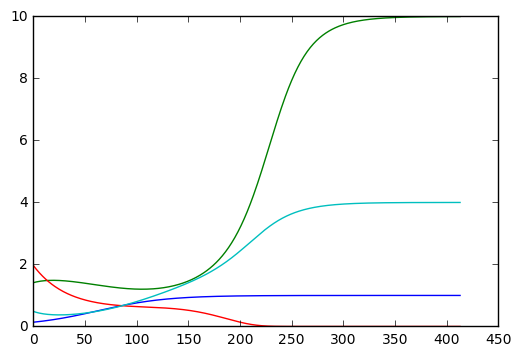

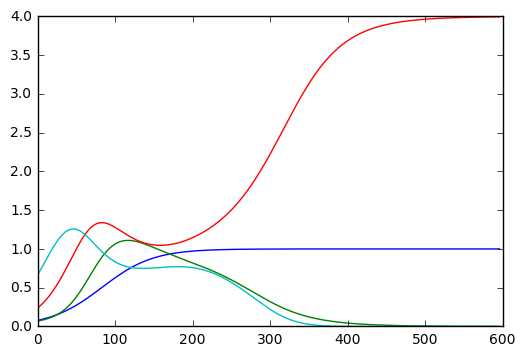

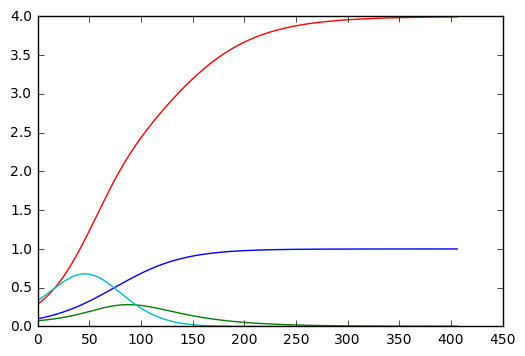

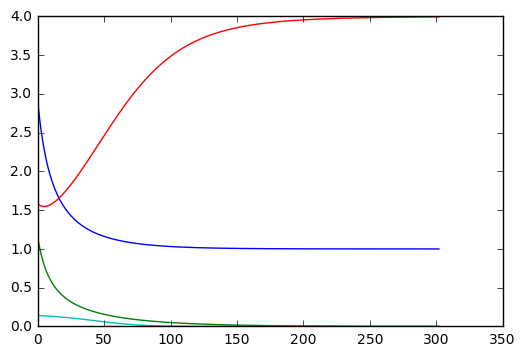

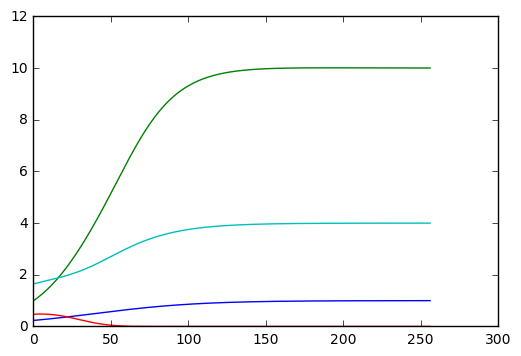

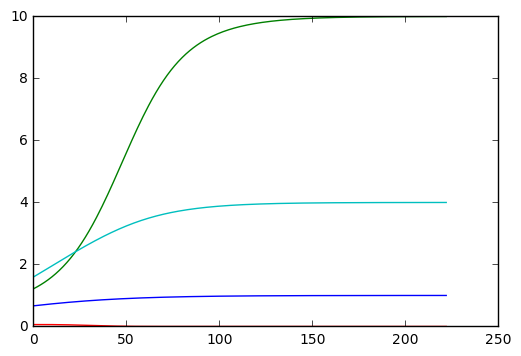

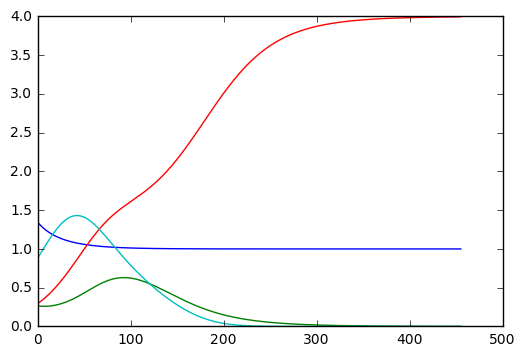

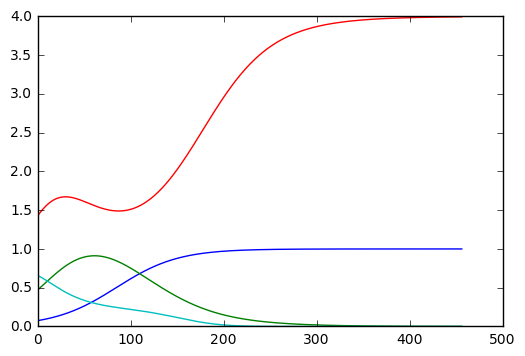

array([[  1.,   0.,   4.,   0.],
       [  1.,   0.,   4.,   0.],
       [  1.,  10.,   0.,   4.],
       [  1.,   0.,   4.,   0.],
       [  1.,   0.,   4.,   0.],
       [  1.,   0.,   4.,   0.],
       [  1.,  10.,   0.,   4.],
       [  1.,  10.,   0.,   4.],
       [  1.,   0.,   4.,   0.],
       [  1.,   0.,   4.,   0.]])

In [168]:
## {1,2,3}, {1,2,4} max in B 
## {1,3}, {1,2,4} max in C 
## Both {1,3} and {1,2,4} is competitive wrt (A,p)
## Both {1,3} and {1,2,4} solves LCP
# A is a real matrix

A = np.matrix([[3,0,0,0],
               [3,1,0,-3],
               [0,3,1,0],
               [0,0,3,1]])
I = np.matrix([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]])
p = np.matrix([[1],[1],[1],[1]])

S = [0,1,2,3]
S1 = [0,1,2]
S2 = [0,1,3]
S3 = [0,2]
S4 = [3]
Q1 = I[np.ix_(S1,S)]
Q2 = I[np.ix_(S2,S)]
Q3 = I[np.ix_(S3,S)]
Q4 = I[np.ix_(S4,S)]
P1 = Q1.T*Q1
P2 = Q2.T*Q2
P3 = Q3.T*Q3
P4 = Q4.T*Q4
A1 = A[np.ix_(S1,S1)]
A2 = A[np.ix_(S2,S2)]
A3 = A[np.ix_(S3,S3)]
A4 = A[np.ix_(S4,S4)]
Av1 = A[np.ix_(S,[0])]
Av2 = A[np.ix_(S,[1])]
Av3 = A[np.ix_(S,[2])]
Av4 = A[np.ix_(S,[3])]
print(lin.eig(A)[0].round(3))
print(lin.pinv(P1*A*P1)*A*p)
print(lin.pinv(P2*A*P2)*A*p)
print(lin.pinv(P3*A*P3)*A*p)
print(lin.pinv(P4*A*P4)*A*p)

p3 = lin.pinv(P3*A*P3)*A*p
p4 = lin.pinv(P4*A*P4)*A*p
print((A3*Q3*(p3-p4)).round(3))
print(((A3-A3*Q3*lin.pinv(P4*A*P4)*Q3.T*A3)*Q3*p3).round(3))
print(p3.round(3))

MonteCarlo_LV(10,A,np.matrix([1,1,1,1]).T)